# User overview analysis

In this analysis i am going to analyze the most essential component of it's business, its customers. I am going to look at the given in a detailed manner by classifying into different phases. During these phases, i am going to apply multiple exploratory techniques and compare results. This analysis is key in that it suggests as the next logical steps, qusetions or areas of research ahead.

In the user overview analysis we are going to go through the following steps: 

Phase 1: Aggregate user behavior
1. Loading the dataset
2. Data cleaning
3. Data transformation

Phase 2:User analysis
1. Identify top 10 handsets
2. Identify top 3 handset manufacturers
3. Identify top 5 handsetsper top 3 manufacturers
4. Provide interpretation on the above subpoints

Phase 3: Application behavior analysis
1. Aggregate User behavior data
2. Visualize user behavior

Phase 4: Exploratory data analysis(EDA)
1. Non-graphical univariate analysis
2. Graphical univariate analysis
3. Bivariate analysis
4. Correlation analysis
5. Dimensionality reduction(PCA)

done with task 1(User overview analysis)


## Phase 1

In this stage the code is going to try to understand the data through common techniques such as, looking for missing values, outliers and in general going through the data cleaning and data transformation stages.

In [2]:
pip install psycopg2-binary sqlalchemy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

In [4]:
from load_data import load_data_from_postgres, load_data_using_sqlalchemy

In [5]:
# Define your SQL query
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL
df = load_data_from_postgres(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")


c:\Users\Beab\Desktop\Kifiya AIM\Investor-feasibility-analysis\scripts\load_data.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfully loaded the data


In [6]:
import pandas as pd

# Assuming df is your DataFrame
# Display the number of rows before outlier removal
print(f"Number of rows before outlier removal: {df.shape[0]}")

# Function to identify and replace outliers using IQR method
def handle_outliers_iqr(df):
    df_cleaned = df.copy()  # Create a copy of the DataFrame for modifications
    outlier_info = {}  # Dictionary to store information about outliers
    
    for column in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df_cleaned[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)]
        
        # Store the count of outliers
        outlier_info[column] = outliers.shape[0]
        
        # Replace outliers with median of the column
        median_value = df_cleaned[column].median()
        df_cleaned.loc[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound), column] = median_value
    
    return df_cleaned, outlier_info

# Apply the function to handle outliers
df_cleaned, outlier_info = handle_outliers_iqr(df)

# Display the number of rows after outlier removal
print(f"Number of rows after outlier removal: {df_cleaned.shape[0]}")

# Display information about outliers
total_outliers_removed = sum(outlier_info.values())
print(f"\nTotal number of outliers removed: {total_outliers_removed}")

# Store the cleaned DataFrame in a new DataFrame
df_outliers_removed = df_cleaned.copy()

# Optionally, display the cleaned DataFrame's first few rows
print("\nFirst few rows of the DataFrame with outliers removed:")
print(df_outliers_removed.head())


Number of rows before outlier removal: 150001
Number of rows after outlier removal: 150001

Total number of outliers removed: 451082

First few rows of the DataFrame with outliers removed:
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0    86399.0  2.082014e+14   3.366496e+10  3.552121e+13   
1    86399.0  2.082019e+14   3.368185e+10  3.579401e+13   
2    86399.0  2.082015e+14   3.366371e+10  3.528151e+13   
3    86399.0  2.082014e+14   3.366371e+10  3.535661e+13   
4    86399.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...

## 2. Data cleaning

Looking for outliers and replacing them using advanced methods like imputation.

In [7]:
import pandas as pd

# Assuming df is your DataFrame
# Display the number of rows before outlier removal
print(f"Number of rows before outlier removal: {df.shape[0]}")

# Function to identify and replace outliers using IQR method
def handle_outliers_iqr(df):
    df_cleaned = df.copy()  # Create a copy of the DataFrame for modifications
    outlier_info = {}  # Dictionary to store information about outliers
    
    for column in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df_cleaned[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)]
        
        # Store the count of outliers
        outlier_info[column] = outliers.shape[0]
        
        # Replace outliers with median of the column
        median_value = df_cleaned[column].median()
        df_cleaned.loc[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound), column] = median_value
    
    return df_cleaned, outlier_info

# Apply the function to handle outliers
df_cleaned, outlier_info = handle_outliers_iqr(df)

# Display the number of rows after outlier removal
print(f"Number of rows after outlier removal: {df_cleaned.shape[0]}")

# Display information about outliers
total_outliers_removed = sum(outlier_info.values())
print(f"\nTotal number of outliers removed: {total_outliers_removed}")

# Store the cleaned DataFrame in a new DataFrame
df_outliers_removed = df_cleaned.copy()

# Optionally, display the cleaned DataFrame's first few rows
print("\nFirst few rows of the DataFrame with outliers removed:")
print(df_outliers_removed.head())


Number of rows before outlier removal: 150001
Number of rows after outlier removal: 150001

Total number of outliers removed: 451082

First few rows of the DataFrame with outliers removed:
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0    86399.0  2.082014e+14   3.366496e+10  3.552121e+13   
1    86399.0  2.082019e+14   3.368185e+10  3.579401e+13   
2    86399.0  2.082015e+14   3.366371e+10  3.528151e+13   
3    86399.0  2.082014e+14   3.366371e+10  3.535661e+13   
4    86399.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...

Looking for missing values and replacing them using advanced statistics techniques like imputation.

In [8]:
import pandas as pd

# Function to handle missing values using advanced statistical methods
def handle_missing_values(df):
    df_filled = df.copy()  # Create a copy of the DataFrame for modifications
    
    for column in df_filled.columns:
        # If the column is numeric (float or int), replace missing values with the median
        if df_filled[column].dtype in ['float64', 'int64']:
            median_value = df_filled[column].median()
            df_filled[column] = df_filled[column].fillna(median_value)
        # If the column is categorical (object), replace missing values with the mode (most frequent value)
        elif df_filled[column].dtype == 'object':
            mode_value = df_filled[column].mode()[0]
            df_filled[column] = df_filled[column].fillna(mode_value)
    
    return df_filled

# Apply the function to handle missing values
df_filled = handle_missing_values(df_outliers_removed)

# Display information about missing values after handling
print("Missing values after imputation:")
print(df_filled.isnull().sum())

# Store the results in a new DataFrame
df_missing_values_handled = df_filled.copy()

# Optionally, display the first few rows of the new DataFrame
print("\nFirst few rows of the DataFrame with missing values handled:")
print(df_missing_values_handled.head())


Missing values after imputation:
Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
1

Lastly insuring that there are no duplicate values and conversion into the correct data types.

In [9]:
import pandas as pd

# Ensure consistency in the dataset
def ensure_consistency(df):
    # Remove duplicate entries
    df_cleaned = df.drop_duplicates().reset_index(drop=True)
    
    # Convert data types to appropriate types
    for column in df_cleaned.columns:
        # If the column contains numeric data but is stored as an object, convert it to numeric
        if df_cleaned[column].dtype == 'object':
            try:
                df_cleaned[column] = pd.to_numeric(df_cleaned[column])
            except ValueError:
                # If conversion fails, it's likely a categorical column, so leave it as is
                pass
        
        # Convert datetime-like strings to actual datetime objects with a specific format if possible
        if df_cleaned[column].dtype == 'object':
            sample_value = df_cleaned[column].dropna().iloc[0]  # Take a sample value from the column
            try:
                # Check if the sample value looks like a date and if so, convert the entire column
                if isinstance(pd.to_datetime(sample_value, format='%Y-%m-%d', errors='raise'), pd.Timestamp):
                    df_cleaned[column] = pd.to_datetime(df_cleaned[column], format='%Y-%m-%d', errors='coerce')
                elif isinstance(pd.to_datetime(sample_value, format='%d/%m/%Y', errors='raise'), pd.Timestamp):
                    df_cleaned[column] = pd.to_datetime(df_cleaned[column], format='%d/%m/%Y', errors='coerce')
                # Add other date formats as needed
            except (ValueError, TypeError):
                # If conversion fails, leave the column as is
                pass
    
    return df_cleaned

# Apply the function to the df_missing_values_handled DataFrame
df_cleaned = ensure_consistency(df_missing_values_handled)

# Optionally, display information about the cleaned DataFrame
print("DataFrame info after ensuring consistency:")
print(df_cleaned.info())

# Optionally, display the first few rows of the cleaned DataFrame
print("\nFirst few rows of the DataFrame after ensuring consistency:")
print(df_cleaned.head())


DataFrame info after ensuring consistency:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150001 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150001 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (ms)                                 150001 non-null  float64
 6   IMSI                                      150001 non-null  float64
 7   MSISDN/Number                             150001 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        150001 

Final overview after the data has been cleaned.

In [10]:
import pandas as pd

def display_dataset_characteristics(df):
    print("### Dataset Characteristics ###\n")
    
    # Display the shape of the dataset
    print(f"Shape of the DataFrame: {df.shape}")
    
    # Display the column data types
    print("\nData Types of Each Column:")
    print(df.dtypes)
    
    # Display summary statistics for numeric columns
    print("\nSummary Statistics for Numeric Columns:")
    print(df.describe())
    
    # Display the count of missing values per column
    print("\nCount of Missing Values per Column:")
    print(df.isnull().sum())
    
    # Display the count of unique values per column
    print("\nCount of Unique Values per Column:")
    print(df.nunique())
    
    # Display the first few rows of the cleaned dataset
    print("\nFirst Few Rows of the DataFrame:")
    print(df.head())
    
# Apply the function to the df_cleaned DataFrame
display_dataset_characteristics(df_cleaned)


### Dataset Characteristics ###

Shape of the DataFrame: (150001, 55)

Data Types of Each Column:
Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 

## Phase 2 User analysis


In this phase we are goijng to identify the top 10 handsets, Identify top 3 hanset manufacturers, identify the top 5 handsets per top 3 manufacturers and a short interpretation.

In [11]:
import pandas as pd

# Phase 2: User Analysis

# 1. Identify Top 10 Handsets
def top_10_handsets(df):
    top_handsets = df['Handset Type'].value_counts().head(10)
    return top_handsets

# 2. Identify Top 3 Handset Manufacturers
def top_3_manufacturers(df):
    top_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
    return top_manufacturers

# 3. Identify Top 5 Handsets per Top 3 Manufacturers
def top_5_handsets_per_manufacturer(df, top_manufacturers):
    top_5_handsets_per_manufacturer = {}
    for manufacturer in top_manufacturers.index:
        handsets = df[df['Handset Manufacturer'] == manufacturer]['Handset Type']
        top_handsets = handsets.value_counts().head(5)
        top_5_handsets_per_manufacturer[manufacturer] = top_handsets
    return top_5_handsets_per_manufacturer

# Execute analysis
top_10_handsets_df = top_10_handsets(df_cleaned)
top_3_manufacturers_df = top_3_manufacturers(df_cleaned)
top_5_handsets_per_manufacturer_df = top_5_handsets_per_manufacturer(df_cleaned, top_3_manufacturers_df)

# Display results
print("### Top 10 Handsets ###")
print(top_10_handsets_df)

print("\n### Top 3 Handset Manufacturers ###")
print(top_3_manufacturers_df)

print("\n### Top 5 Handsets per Top 3 Manufacturers ###")
for manufacturer, handsets in top_5_handsets_per_manufacturer_df.items():
    print(f"\n{manufacturer}:")
    print(handsets)


### Top 10 Handsets ###
Handset Type
Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

### Top 3 Handset Manufacturers ###
Handset Manufacturer
Apple      60137
Samsung    40839
Huawei     34423
Name: count, dtype: int64

### Top 5 Handsets per Top 3 Manufacturers ###

Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3

## Interpretation of the above analysis about handset type and handsetmanufacturers
The analysis of the dataset reveals that **Apple**, **Samsung**, and **Huawei** are the top three handset manufacturers, with Apple leading by a significant margin in terms of handset usage. Apple devices dominate the list of top 10 handsets, with models like the Apple iPhone 6S and iPhone 6 being the most frequently used. This indicates strong brand loyalty and high usage rates for Apple's product line.

Samsung follows as the second most popular manufacturer, with the Samsung Galaxy S8 being the most used handset among Samsung models. Samsung's top 5 handsets include various Galaxy models, highlighting the popularity of their Galaxy series among users.

Huawei ranks third, with the Huawei B528S-23A being the most prevalent handset in their lineup. While Huawei's top 5 handsets show a diversity of models, their usage frequency is lower compared to Apple and Samsung. This suggests that while Huawei is a significant player in the market, it does not match the dominance of Apple and Samsung in terms of handset popularity.


## Phase 3: Application Beahvior Analsyis

In this stage we are going to aggregate user behavior data and visualize user behavior.  

### Aggregation of User behavior data:

In [28]:
import pandas as pd

# Sample DataFrame creation for demonstration purposes
# df_cleaned = pd.read_csv('your_data_file.csv')  # Replace with your actual data loading code

# Phase 3: Application Behavior Analysis

# Define the columns for aggregation
agg_columns = {
    'Bearer Id': 'Number_of_sessions',
    'Dur. (ms)': 'Total_duration',
    'total_download_data': 'Total_download_data',
    'total_upload_data': 'Total_upload_data',
    'social_media_dl': 'Social_media_dl',
    'social_media_ul': 'Social_media_ul',
    'Youtube DL (Bytes)': 'Youtube_dl',
    'Youtube UL (Bytes)': 'Youtube_ul',
    'netflix_dl': 'Netflix_dl',
    'Netflix_ul': 'Netflix_ul',
    'google_dl': 'Google_dl',
    'google_ul': 'Google_ul',
    'email_dl': 'Email_dl',
    'email_ul': 'Email_ul',
    'gaming_dl': 'Gaming_dl',
    'gaming_ul': 'Gaming_ul'
}

# Aggregate User Behavior Data
def aggregate_user_behavior(df):
    try:
        # Aggregate data by user
        user_behavior = df.groupby('MSISDN/Number').agg(
            number_of_sessions=('Bearer Id', 'count'),
            total_duration=('Dur. (ms)', 'sum'),
            total_download_data=('total_download_data', 'sum'),
            total_upload_data=('total_upload_data', 'sum'),
            social_media_dl=('social_media_dl', 'sum'),
            social_media_ul=('social_media_ul', 'sum'),
            youtube_dl=('Youtube DL (Bytes)', 'sum'),
            youtube_ul=('Youtube UL (Bytes)', 'sum'),
            netflix_dl=('netflix_dl', 'sum'),
            netflix_ul=('netflix_ul', 'sum'),
            google_dl=('google_dl', 'sum'),
            google_ul=('google_ul', 'sum'),
            email_dl=('email_dl', 'sum'),
            email_ul=('email_ul', 'sum'),
            gaming_dl=('gaming_dl', 'sum'),
            gaming_ul=('gaming_ul', 'sum')
        ).reset_index()
        return user_behavior
    except KeyError as e:
        print(f"KeyError: {e}")
        print("Check if all column names used in aggregation exist in the DataFrame.")
        return None

# Aggregate the data
user_behavior = aggregate_user_behavior(df_cleaned)

# Display the result
if user_behavior is not None:
    print(user_behavior.head())  # Display the first few rows of the aggregated data


   MSISDN/Number  number_of_sessions  total_duration  total_download_data  \
0   3.360301e+10                   2        120325.0          559774090.0   
1   3.360301e+10                   1        135718.0          809319344.0   
2   3.360301e+10                   1        109906.0           73126355.0   
3   3.360301e+10                   1        135968.0          404238587.0   
4   3.360301e+10                   2        317851.0          663280757.0   

   total_upload_data  social_media_dl  social_media_ul  youtube_dl  \
0         82689008.0        3645050.0          34363.0  19763706.0   
1         54693881.0        3129315.0          26481.0  12069683.0   
2         49178027.0        2889635.0          31756.0  21993049.0   
3         42532640.0        1937284.0          56480.0   7340018.0   
4        121212483.0        5673144.0           9576.0  23605808.0   

   youtube_ul  netflix_dl  netflix_ul   google_dl  google_ul   email_dl  \
0  23968713.0  21531149.0  28849501.0  13

### Visualizations for User behavior:

C:\Users\Beab\AppData\Local\Temp\ipykernel_20476\2732572917.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Data (Bytes)', y='Application', data=behavior_data, palette='viridis')


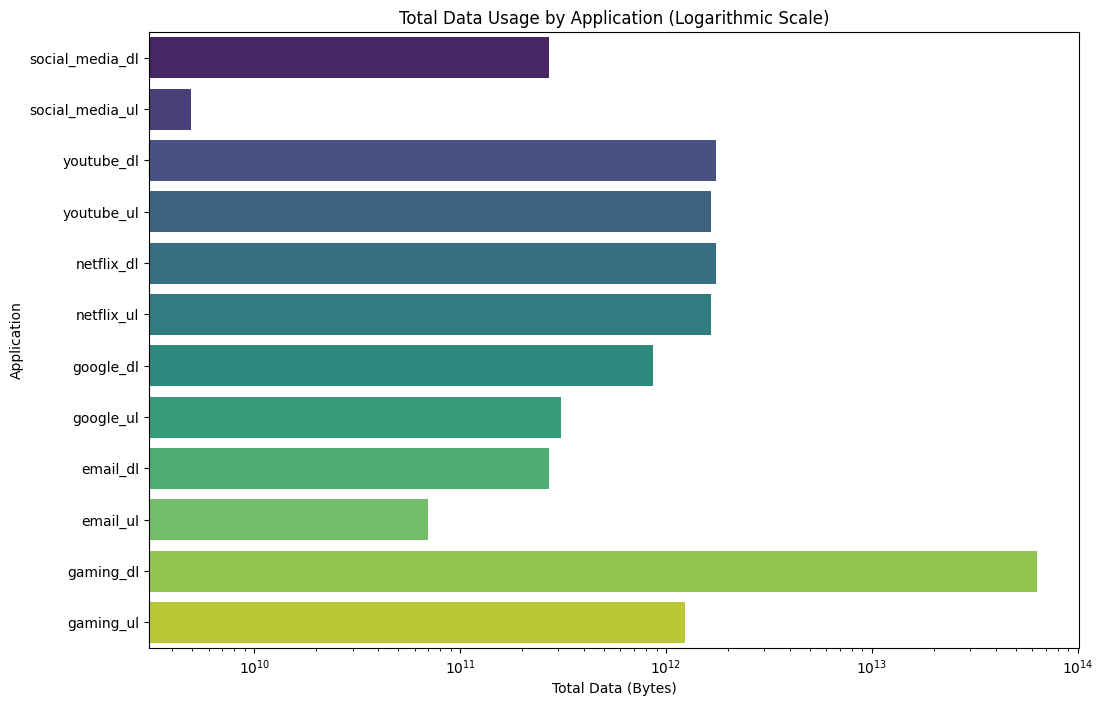

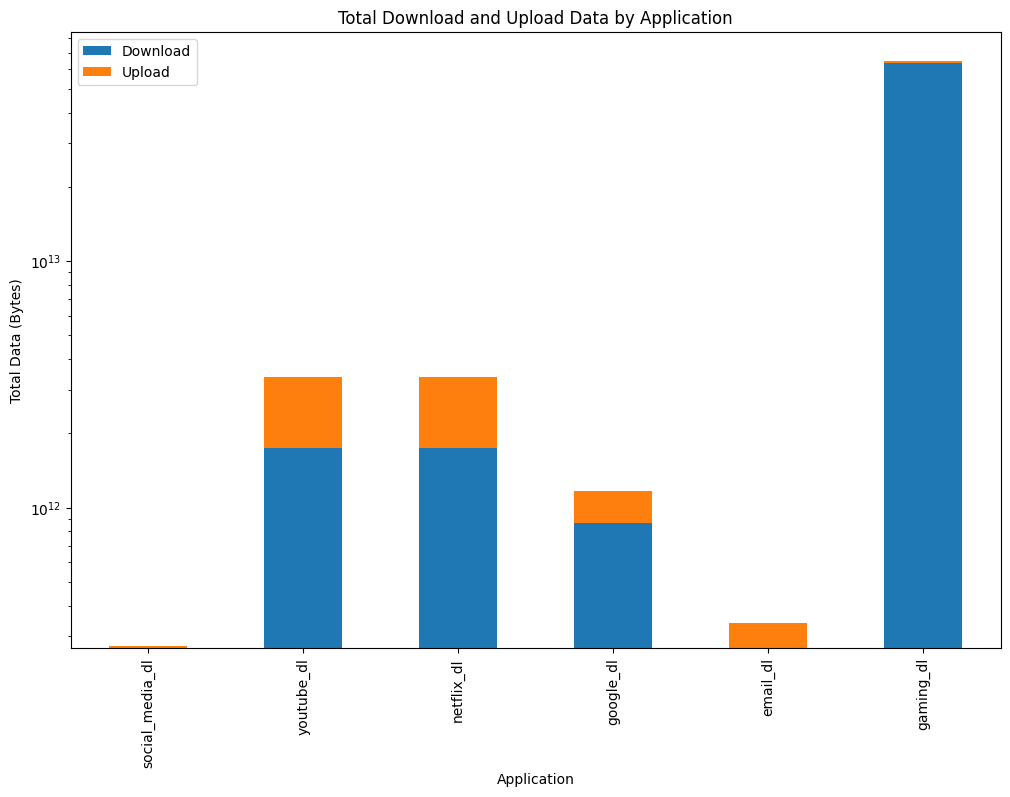

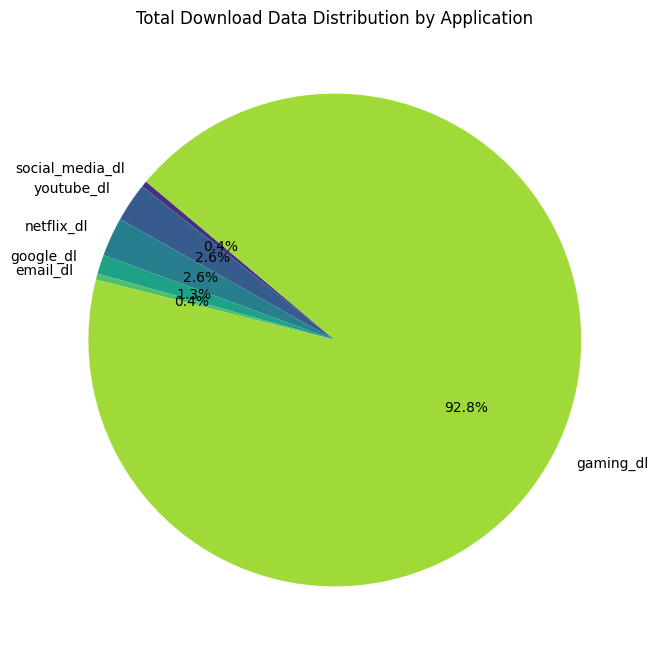

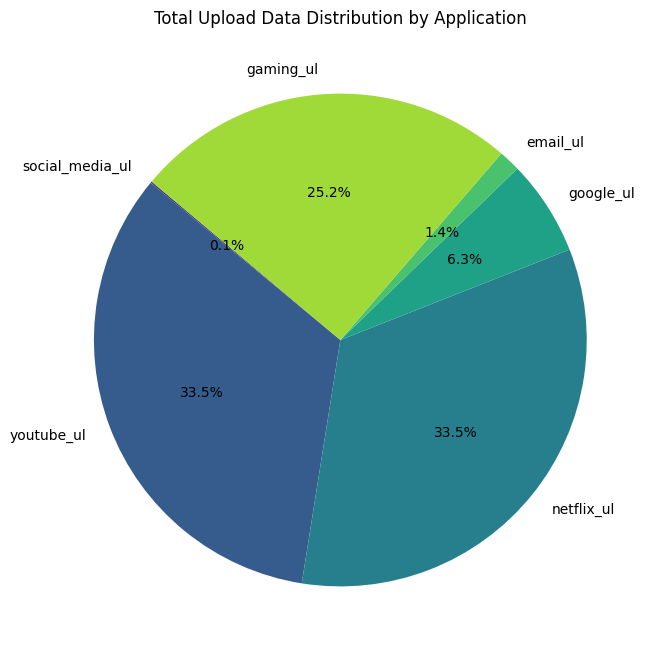

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame creation for demonstration purposes
# df_cleaned = pd.read_csv('your_data_file.csv')  # Replace with your actual data loading code

# Phase 3: Application Behavior Analysis

# Define the columns for aggregation
agg_columns = {
    'Bearer Id': 'Number_of_sessions',
    'Dur. (ms)': 'Total_duration',
    'total_download_data': 'Total_download_data',
    'total_upload_data': 'Total_upload_data',
    'social_media_dl': 'Social_media_dl',
    'social_media_ul': 'Social_media_ul',
    'Youtube DL (Bytes)': 'Youtube_dl',
    'Youtube UL (Bytes)': 'Youtube_ul',
    'netflix_dl': 'Netflix_dl',
    'Netflix_ul': 'Netflix_ul',
    'google_dl': 'Google_dl',
    'google_ul': 'Google_ul',
    'email_dl': 'Email_dl',
    'email_ul': 'Email_ul',
    'gaming_dl': 'Gaming_dl',
    'gaming_ul': 'Gaming_ul'
}

# Aggregate User Behavior Data
def aggregate_user_behavior(df):
    try:
        # Aggregate data by user
        user_behavior = df.groupby('MSISDN/Number').agg(
            number_of_sessions=('Bearer Id', 'count'),
            total_duration=('Dur. (ms)', 'sum'),
            total_download_data=('total_download_data', 'sum'),
            total_upload_data=('total_upload_data', 'sum'),
            social_media_dl=('social_media_dl', 'sum'),
            social_media_ul=('social_media_ul', 'sum'),
            youtube_dl=('Youtube DL (Bytes)', 'sum'),
            youtube_ul=('Youtube UL (Bytes)', 'sum'),
            netflix_dl=('netflix_dl', 'sum'),
            netflix_ul=('netflix_ul', 'sum'),
            google_dl=('google_dl', 'sum'),
            google_ul=('google_ul', 'sum'),
            email_dl=('email_dl', 'sum'),
            email_ul=('email_ul', 'sum'),
            gaming_dl=('gaming_dl', 'sum'),
            gaming_ul=('gaming_ul', 'sum')
        ).reset_index()
        return user_behavior
    except KeyError as e:
        print(f"KeyError: {e}")
        print("Check if all column names used in aggregation exist in the DataFrame.")
        return None

# Aggregate the data
user_behavior = aggregate_user_behavior(df_cleaned)

# Visualize User Behavior
if user_behavior is not None:
    # 1. Bar Chart of Total Download and Upload Data by Application with Logarithmic Scale
    applications = [
        'social_media_dl', 'social_media_ul',
        'youtube_dl', 'youtube_ul',
        'netflix_dl', 'netflix_ul',
        'google_dl', 'google_ul',
        'email_dl', 'email_ul',
        'gaming_dl', 'gaming_ul'
    ]
    
    # Create a new DataFrame for plotting
    behavior_data = user_behavior[applications].sum().reset_index()
    behavior_data.columns = ['Application', 'Total Data (Bytes)']
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Total Data (Bytes)', y='Application', data=behavior_data, palette='viridis')
    plt.xscale('log')  # Apply logarithmic scale to the x-axis
    plt.title('Total Data Usage by Application (Logarithmic Scale)')
    plt.xlabel('Total Data (Bytes)')
    plt.ylabel('Application')
    plt.show()
    
    # 2. Stacked Bar Chart of Total Download and Upload Data by Application
    # Create DataFrame for stacked bar chart
    download_data = user_behavior[['social_media_dl', 'youtube_dl', 'netflix_dl', 'google_dl', 'email_dl', 'gaming_dl']].sum()
    upload_data = user_behavior[['social_media_ul', 'youtube_ul', 'netflix_ul', 'google_ul', 'email_ul', 'gaming_ul']].sum()

    stacked_data = pd.DataFrame({
        'Application': download_data.index,
        'Download': download_data.values,
        'Upload': upload_data.values
    })

    # Plot stacked bar chart
    stacked_data.set_index('Application').plot(kind='bar', stacked=True, figsize=(12, 8), color=['#1f77b4', '#ff7f0e'])
    plt.title('Total Download and Upload Data by Application')
    plt.xlabel('Application')
    plt.ylabel('Total Data (Bytes)')
    plt.yscale('log')  # Apply logarithmic scale to the y-axis for better visualization
    plt.show()
    
    # 3. Pie Chart of Total Download Data by Application with Logarithmic Scale
    download_data = user_behavior[['social_media_dl', 'youtube_dl', 'netflix_dl', 'google_dl', 'email_dl', 'gaming_dl']].sum()
    plt.figure(figsize=(10, 8))
    plt.pie(download_data, labels=download_data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(download_data)))
    plt.title('Total Download Data Distribution by Application')
    plt.show()
    
    # 4. Pie Chart of Total Upload Data by Application with Logarithmic Scale
    upload_data = user_behavior[['social_media_ul', 'youtube_ul', 'netflix_ul', 'google_ul', 'email_ul', 'gaming_ul']].sum()
    plt.figure(figsize=(10, 8))
    plt.pie(upload_data, labels=upload_data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(upload_data)))
    plt.title('Total Upload Data Distribution by Application')
    plt.show()


## Phase 4: Exploratory Data Analysis(EDA)

In this phase we are going to conduct non-graphical univariate analysis, graphical univariate analysis, bivariate analysis, correlation analysis and dimensionality reduction.

### 1. Conduct non-graphical univariate analysis

In [41]:
import pandas as pd

# Sample DataFrame creation for demonstration purposes
# df_cleaned = pd.read_csv('your_data_file.csv')  # Replace with your actual data loading code

# Define the columns for univariate analysis
quantitative_columns = [
    'Dur. (ms)', 
    'total_download_data', 
    'total_upload_data', 
    'social_media_dl', 
    'social_media_ul', 
    'Youtube DL (Bytes)', 
    'Youtube UL (Bytes)', 
    'netflix_dl', 
    'Netflix_ul', 
    'google_dl', 
    'google_ul', 
    'email_dl', 
    'email_ul', 
    'gaming_dl', 
    'gaming_ul'
]

# Non-Graphical Univariate Analysis
def univariate_analysis(df, columns):
    results = {}
    for column in columns:
        if column in df.columns:
            # Compute metrics
            mean = df[column].mean()
            median = df[column].median()
            std_dev = df[column].std()
            range_ = df[column].max() - df[column].min()

            # Store results
            results[column] = {
                'Mean': mean,
                'Median': median,
                'Standard Deviation': std_dev,
                'Range': range_
            }
        else:
            print(f"Column '{column}' not found in the DataFrame.")
    
    return pd.DataFrame(results).T

# Perform the univariate analysis
analysis_results = univariate_analysis(df_cleaned, quantitative_columns)

# Display the results
print(analysis_results)

Column 'Netflix_ul' not found in the DataFrame.
                             Mean       Median  Standard Deviation  \
Dur. (ms)            9.198034e+04      86399.0        4.929436e+04   
total_download_data  4.546434e+08  455841077.5        2.441421e+08   
total_upload_data    4.111975e+07   41143312.0        1.119712e+07   
social_media_dl      1.795322e+06    1794369.0        1.035482e+06   
social_media_ul      3.292843e+04      32920.0        1.900618e+04   
Youtube DL (Bytes)   1.163407e+07   11616019.0        6.710569e+06   
Youtube UL (Bytes)   1.100941e+07   11013447.0        6.345423e+06   
netflix_dl           1.162685e+07   11642217.0        6.725218e+06   
google_dl            5.750753e+06    5765829.0        3.309097e+06   
google_ul            2.056542e+06    2054573.0        1.189917e+06   
email_dl             1.791729e+06    1793505.0        1.035840e+06   
email_ul             4.673734e+05     466250.0        2.699693e+05   
gaming_dl            4.220447e+08  4234081

#### Interpretation for the above results  
The univariate analysis of the dataset reveals key insights into the distribution of various quantitative variables related to application behavior. For instance, the average session duration (`Dur. (ms)`) is approximately 91,980 milliseconds (or about 92 seconds), with a substantial variability indicated by a standard deviation of 49,294 milliseconds. This large standard deviation suggests that session durations vary significantly among users, which may indicate diverse usage patterns or inconsistencies in data recording.

Data related to total download and upload activities show considerable figures, with the mean total download data reaching around 454,643,400 bytes and the mean total upload data at approximately 41,119,750 bytes. The standard deviations for these metrics are high, reflecting the wide range of data usage among users. Specifically, the data for social media downloads and uploads also exhibits significant variability, with high mean values and substantial standard deviations. This indicates that some users are far more engaged with social media platforms compared to others.

It is noteworthy that the `Netflix_ul` column was not found in the DataFrame, suggesting potential data quality issues or missing data. Despite this, the analysis for other variables like YouTube, Google, email, and gaming data shows diverse usage patterns, with gaming downloads and uploads having particularly high mean values and ranges. This analysis highlights the importance of examining individual variables closely, as high variability can impact overall data trends and interpretations.

### 2. Graphical univariate analysis

C:\Users\Beab\AppData\Local\Temp\ipykernel_20476\4072508028.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, color='red')


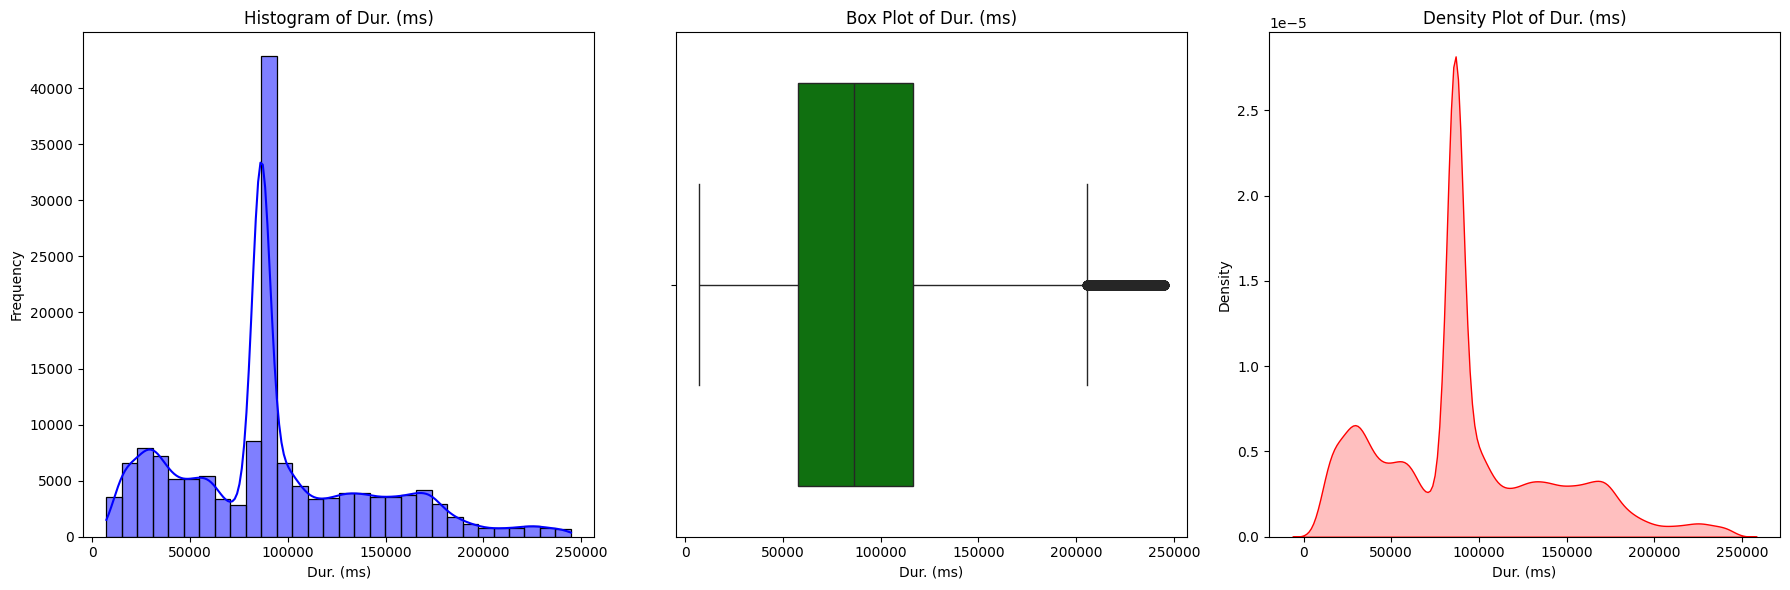

C:\Users\Beab\AppData\Local\Temp\ipykernel_20476\4072508028.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, color='red')


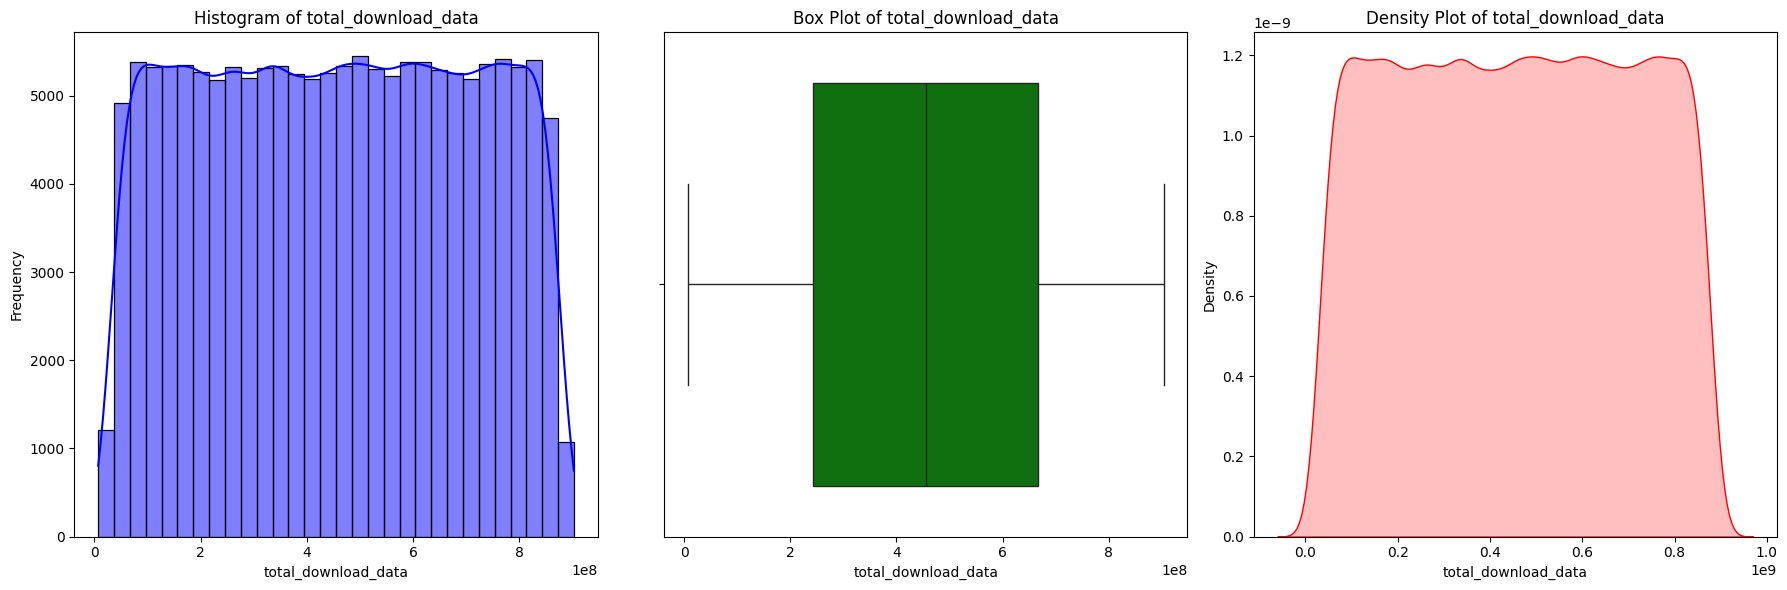

C:\Users\Beab\AppData\Local\Temp\ipykernel_20476\4072508028.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, color='red')


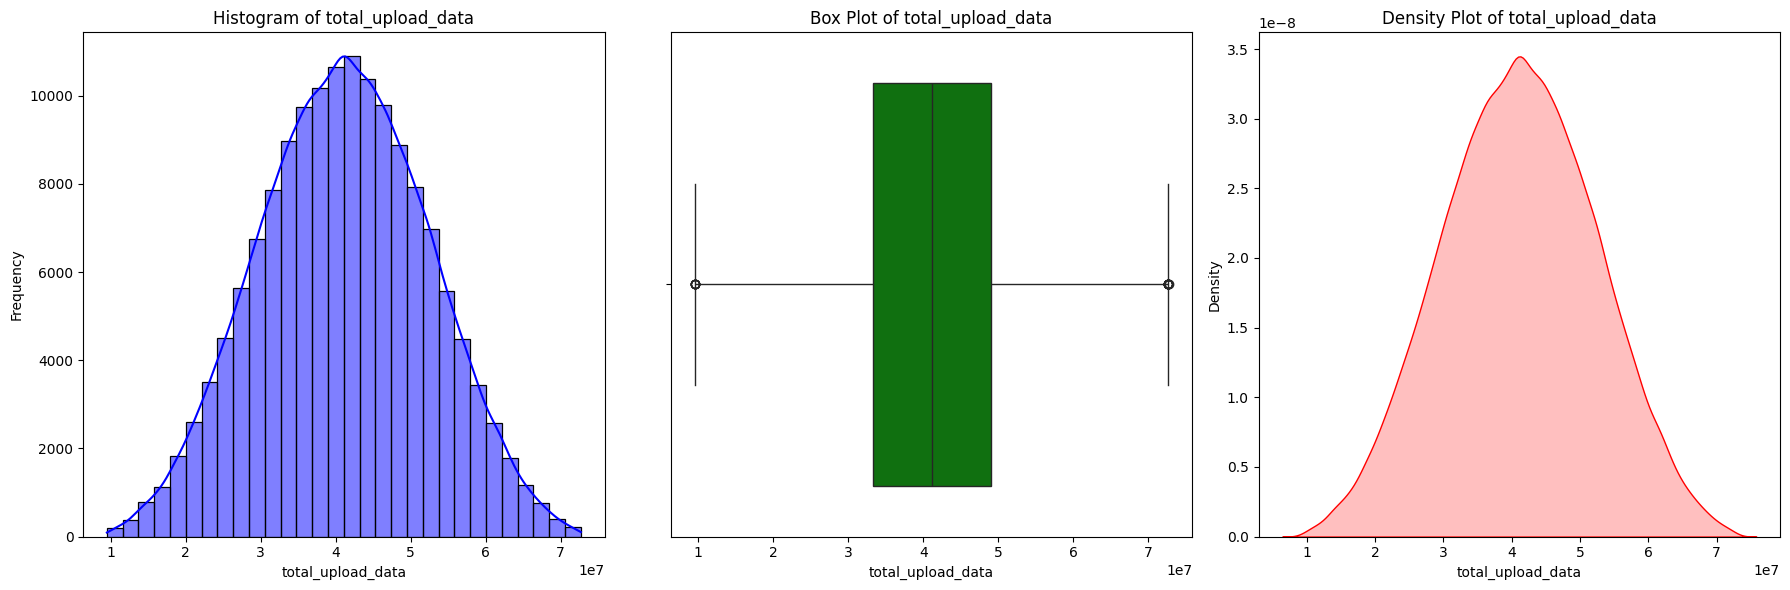

C:\Users\Beab\AppData\Local\Temp\ipykernel_20476\4072508028.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, color='red')


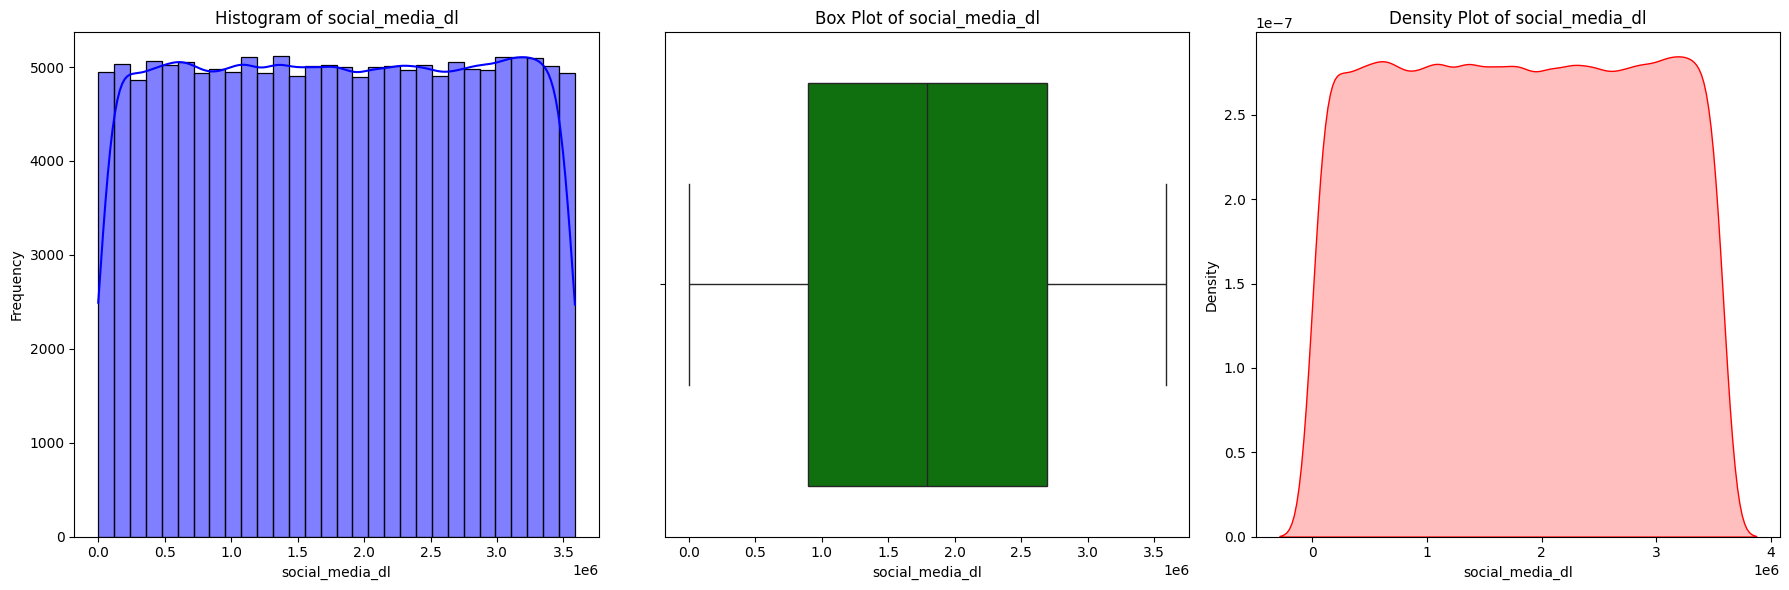

C:\Users\Beab\AppData\Local\Temp\ipykernel_20476\4072508028.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, color='red')


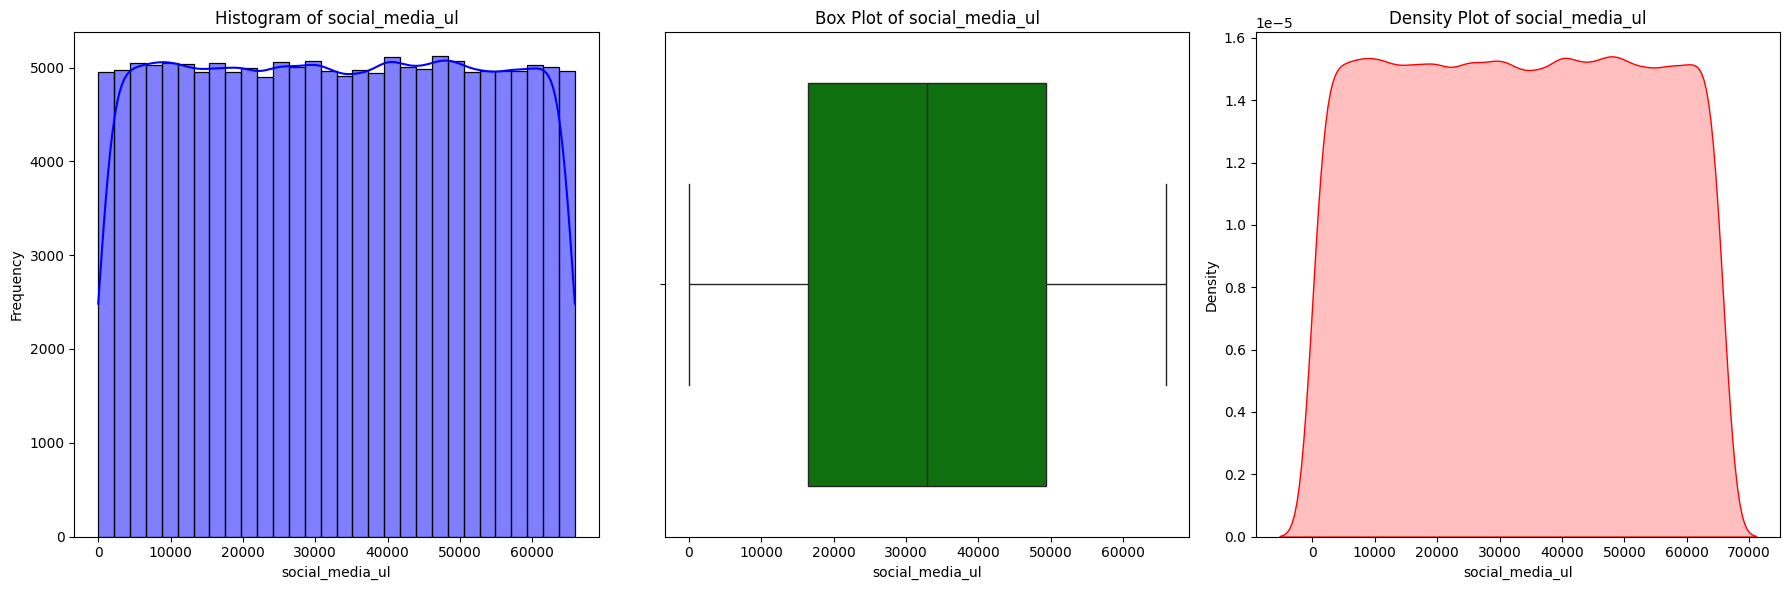

C:\Users\Beab\AppData\Local\Temp\ipykernel_20476\4072508028.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, color='red')


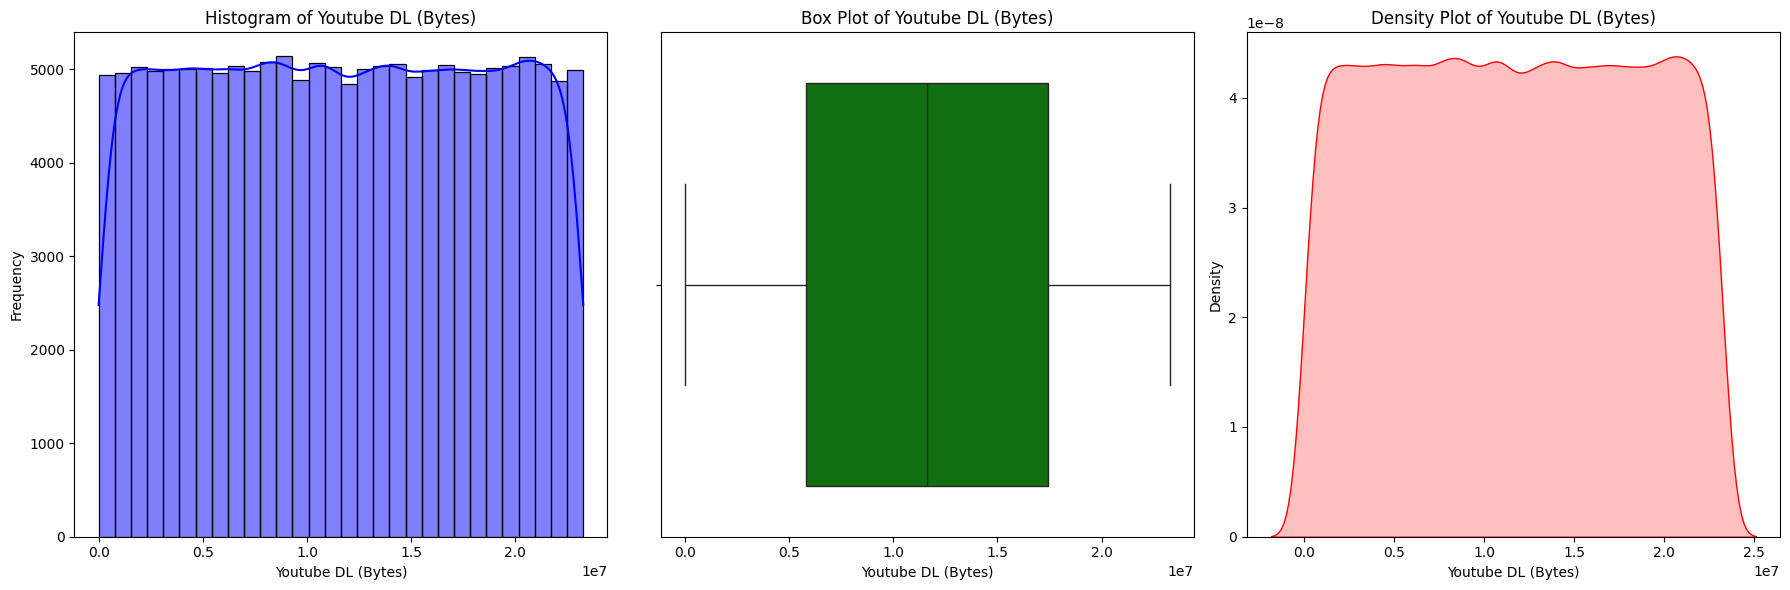

C:\Users\Beab\AppData\Local\Temp\ipykernel_20476\4072508028.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, color='red')


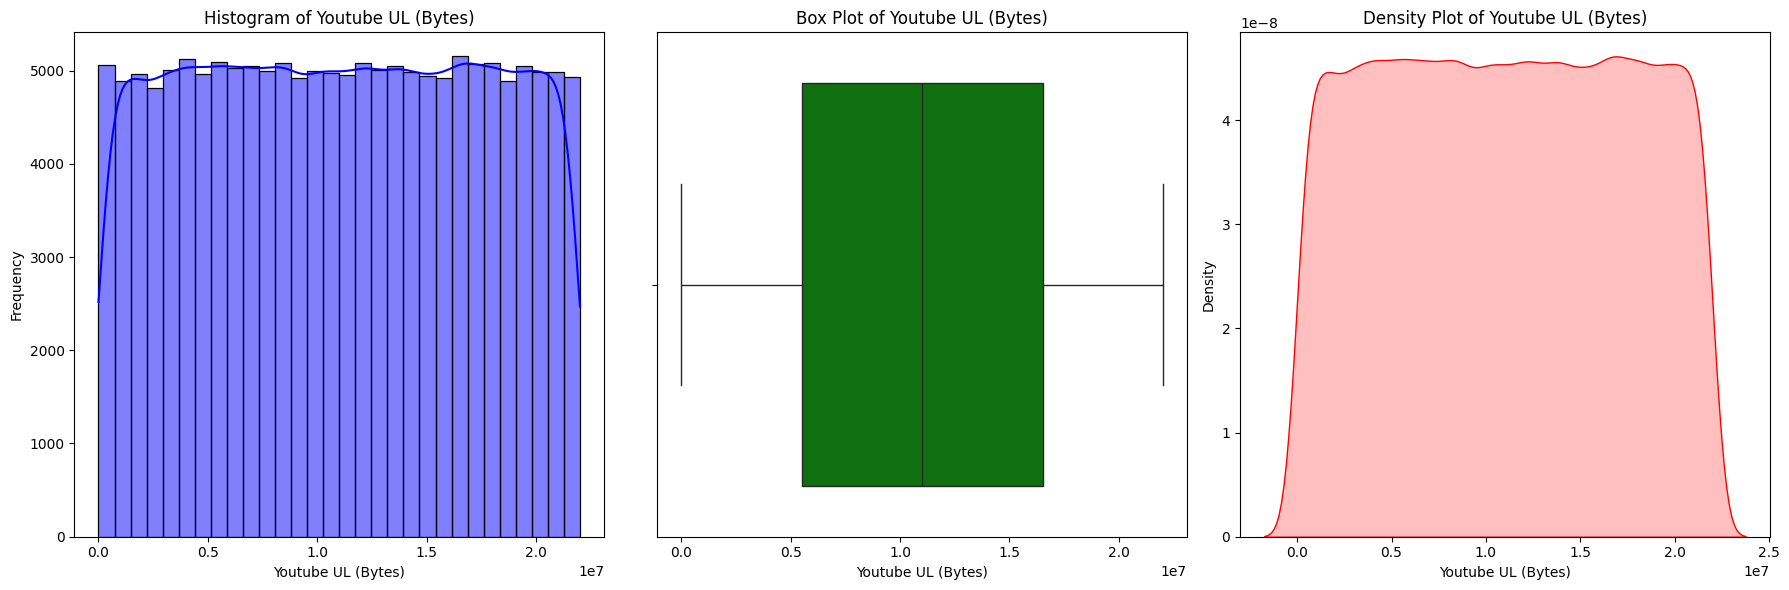

C:\Users\Beab\AppData\Local\Temp\ipykernel_20476\4072508028.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, color='red')


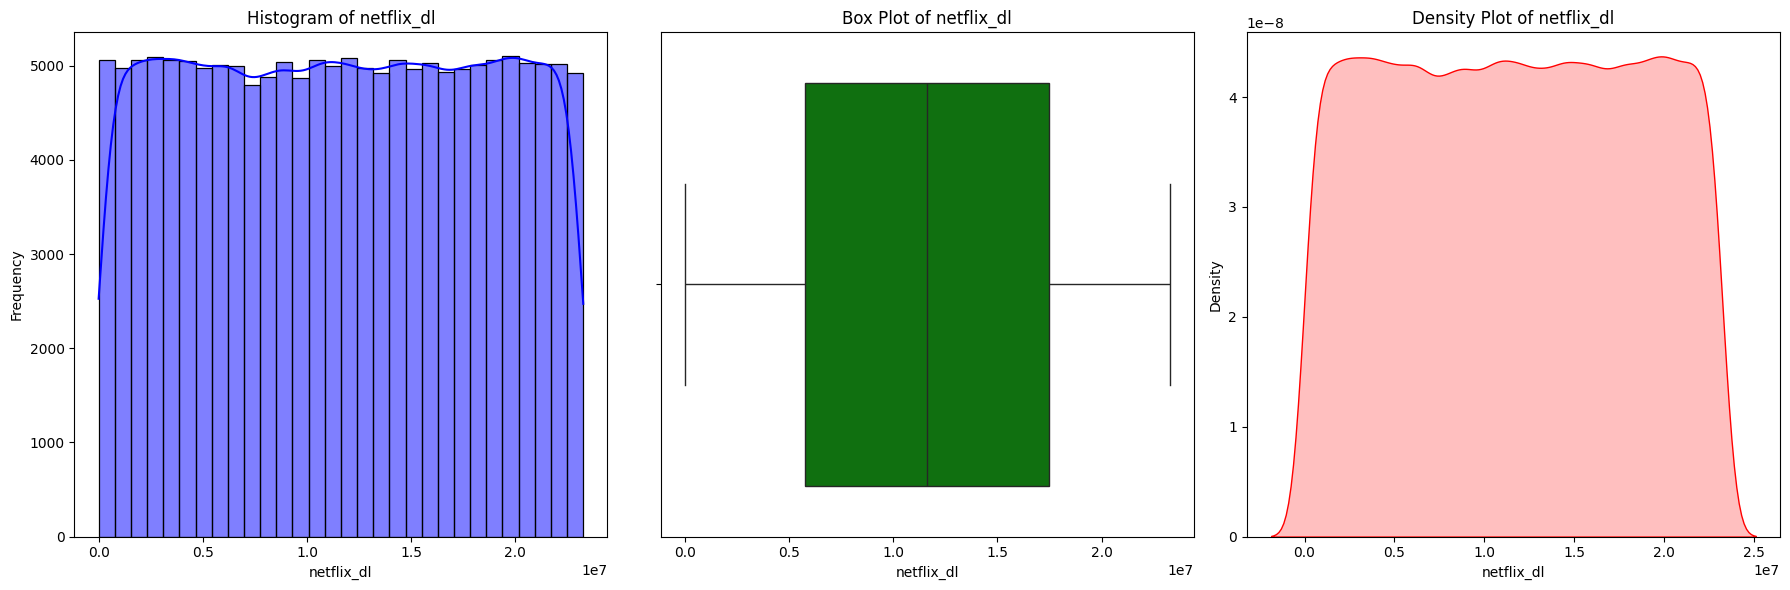

C:\Users\Beab\AppData\Local\Temp\ipykernel_20476\4072508028.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, color='red')


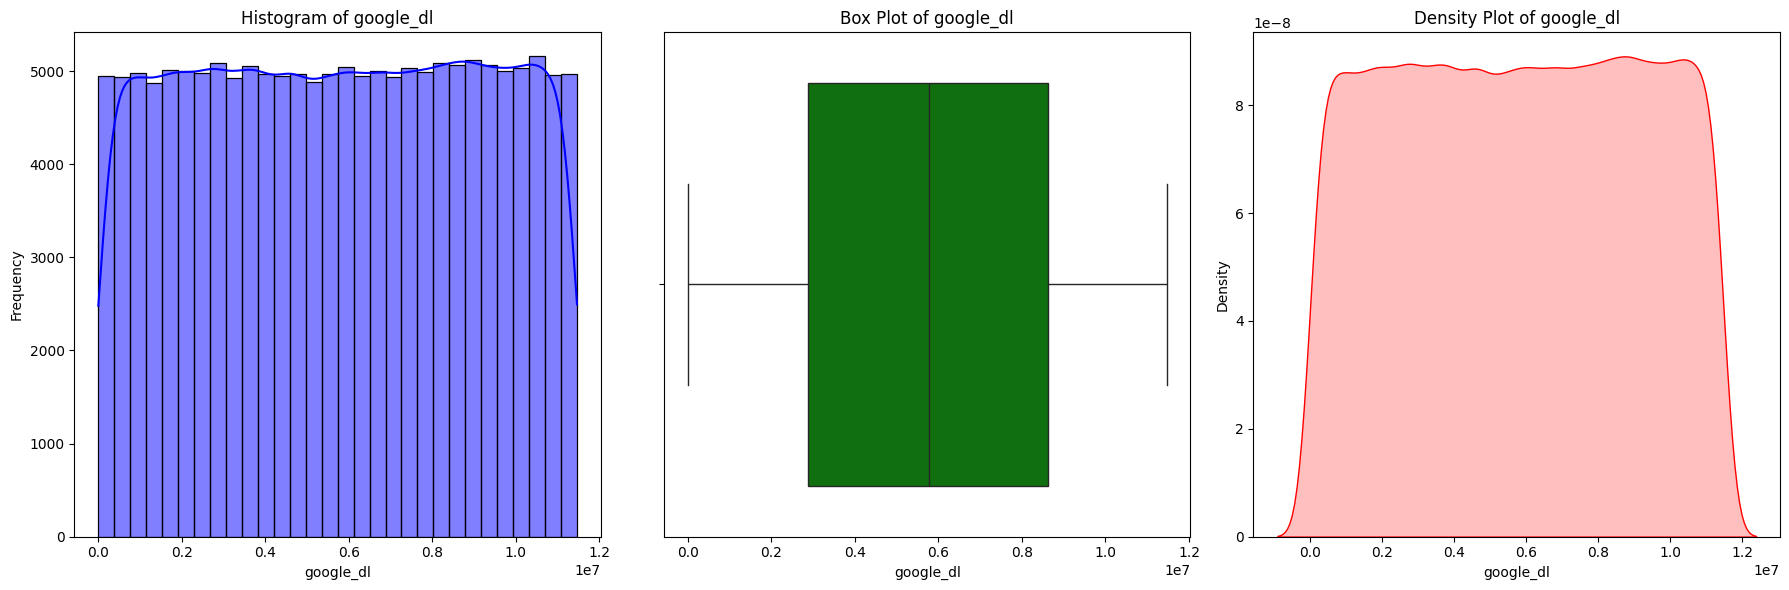

C:\Users\Beab\AppData\Local\Temp\ipykernel_20476\4072508028.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, color='red')


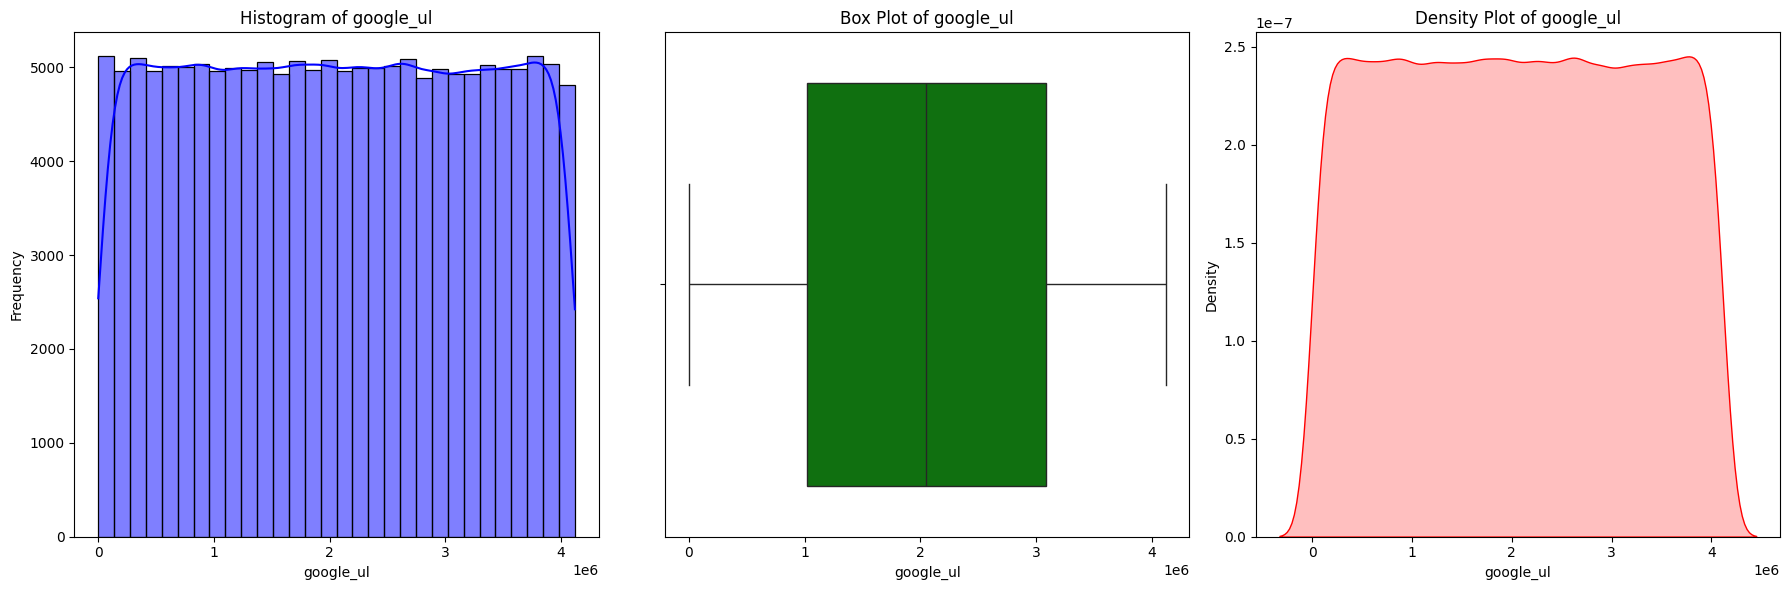

C:\Users\Beab\AppData\Local\Temp\ipykernel_20476\4072508028.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, color='red')


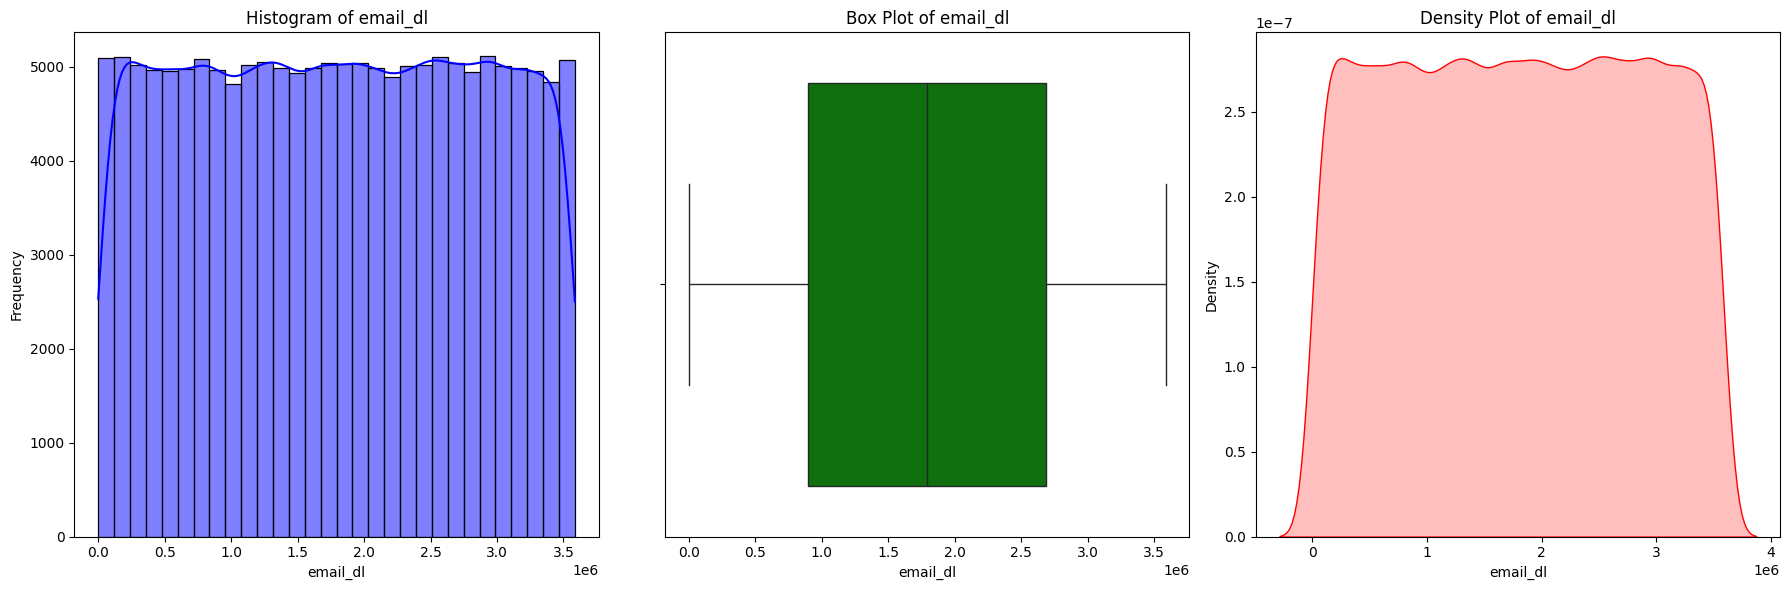

C:\Users\Beab\AppData\Local\Temp\ipykernel_20476\4072508028.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, color='red')


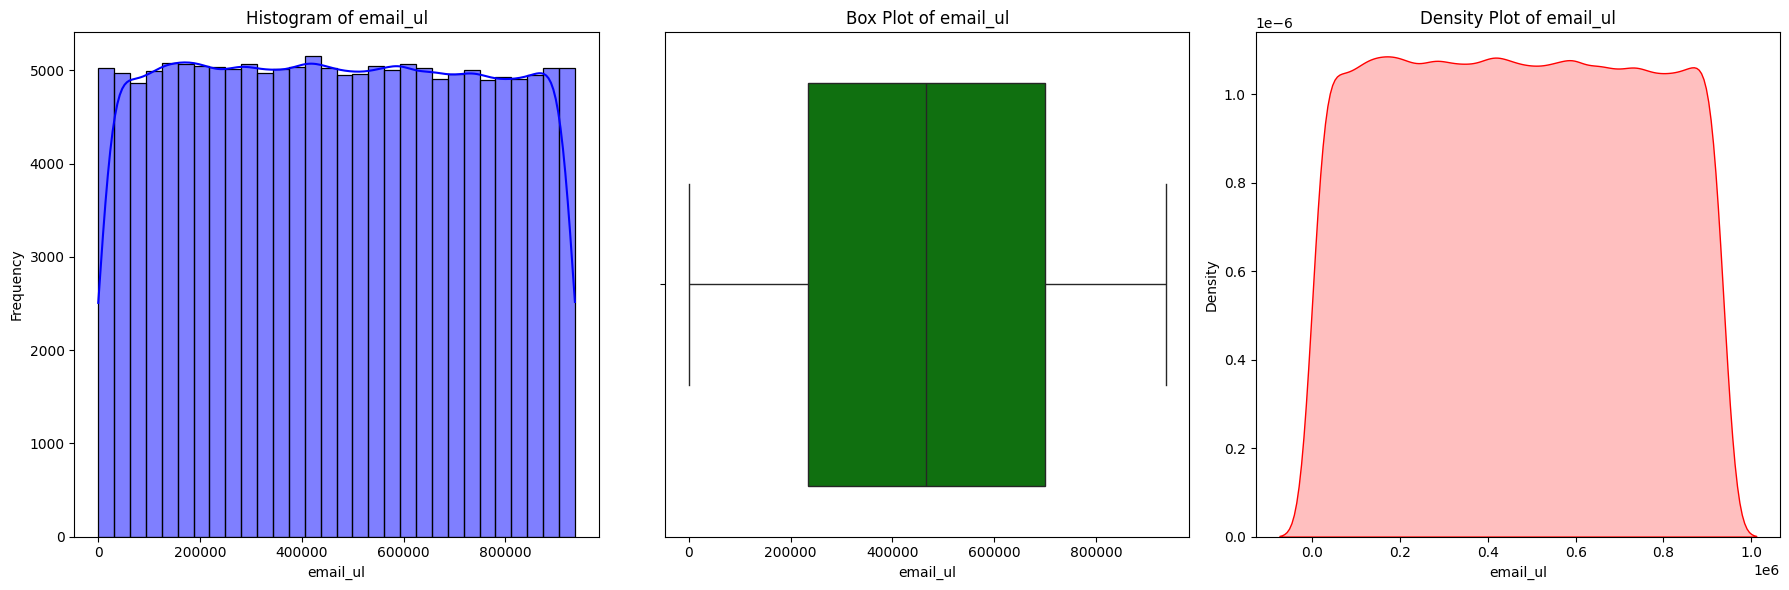

C:\Users\Beab\AppData\Local\Temp\ipykernel_20476\4072508028.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, color='red')


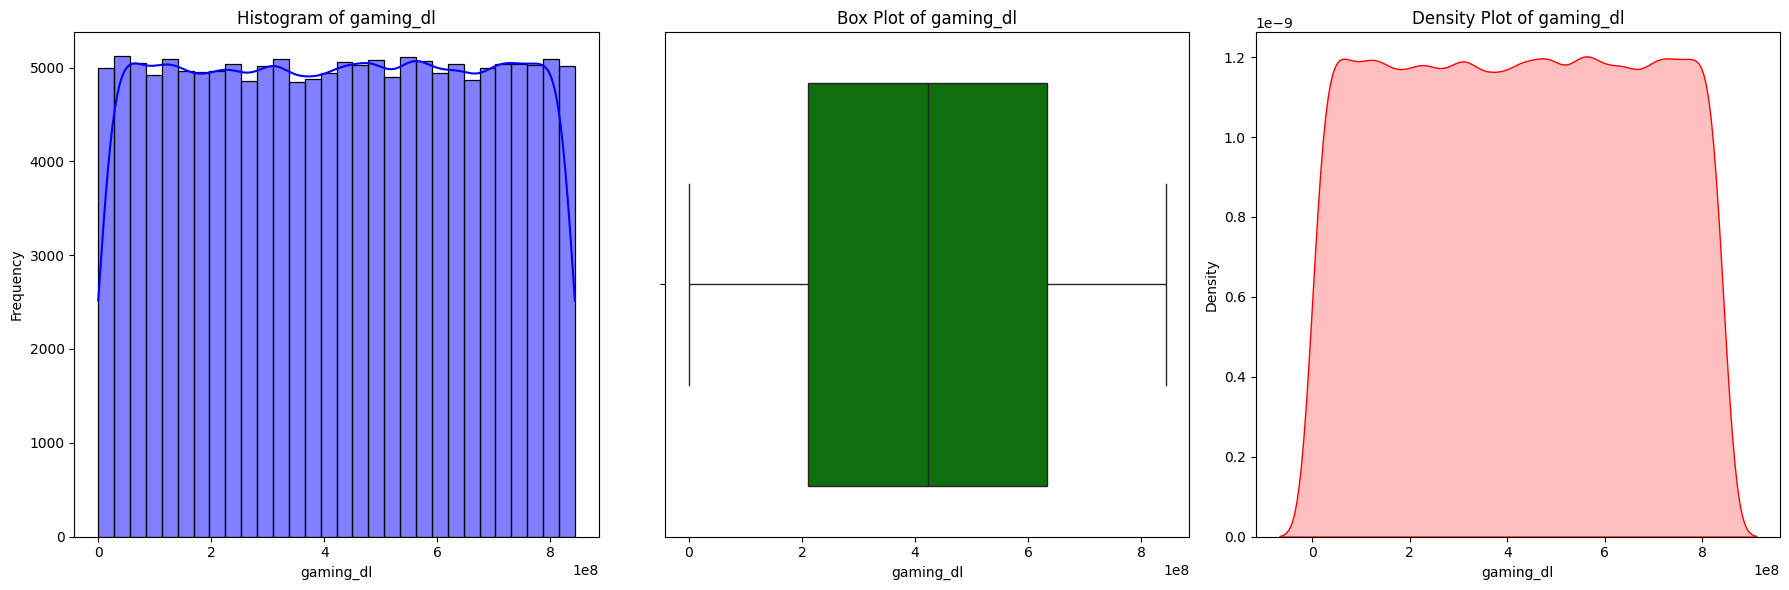

C:\Users\Beab\AppData\Local\Temp\ipykernel_20476\4072508028.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, color='red')


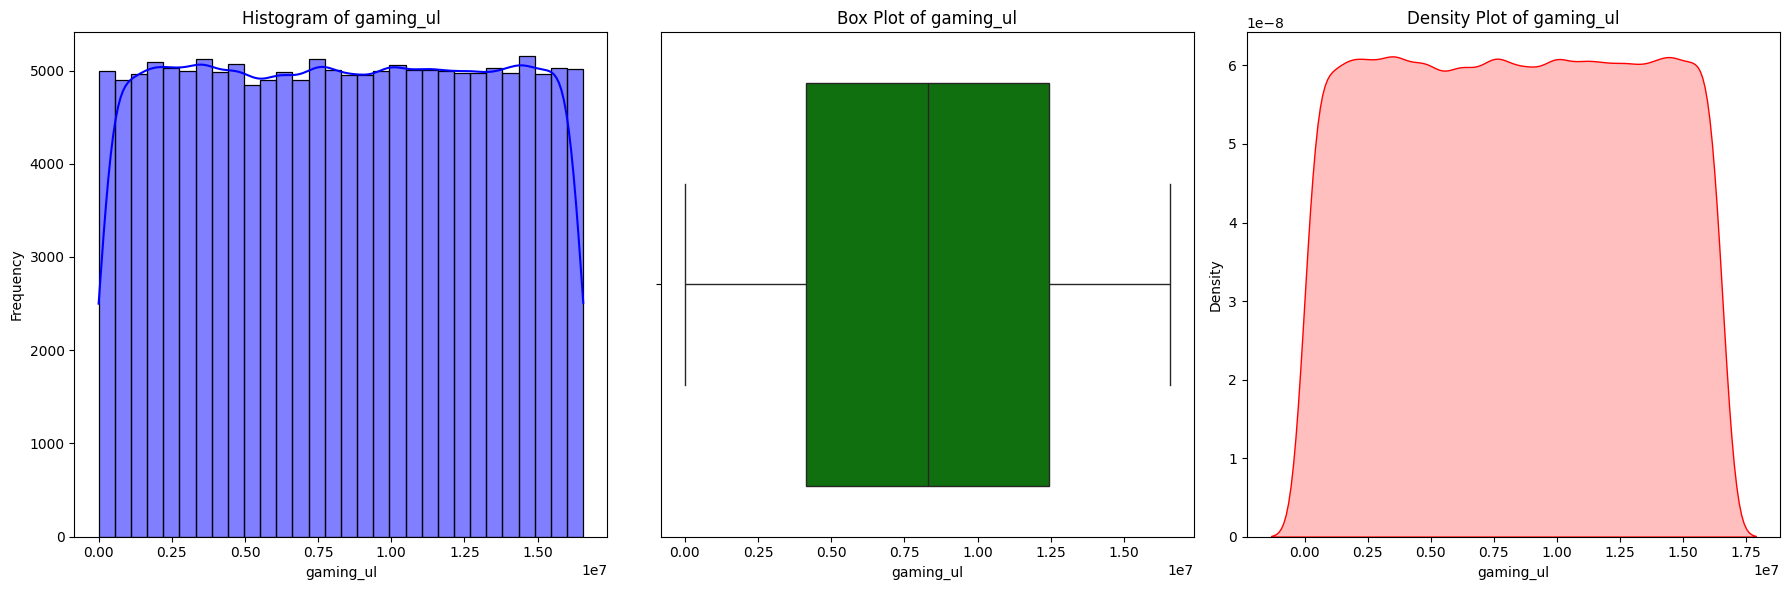

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_cleaned is already loaded and available
# df_cleaned = pd.read_csv('your_data_file.csv')  # Replace with your actual data loading code

# Define the columns for visualization
visualization_columns = [
    'Dur. (ms)', 
    'total_download_data', 
    'total_upload_data', 
    'social_media_dl', 
    'social_media_ul', 
    'Youtube DL (Bytes)', 
    'Youtube UL (Bytes)', 
    'netflix_dl', 
    'google_dl', 
    'google_ul', 
    'email_dl', 
    'email_ul', 
    'gaming_dl', 
    'gaming_ul'
]

# Function to create visualizations
def create_visualizations(df, columns):
    for column in columns:
        if column in df.columns:
            plt.figure(figsize=(18, 6))

            # Histogram
            plt.subplot(1, 3, 1)
            sns.histplot(df[column], bins=30, kde=True, color='blue')
            plt.title(f'Histogram of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')

            # Box Plot
            plt.subplot(1, 3, 2)
            sns.boxplot(x=df[column], color='green')
            plt.title(f'Box Plot of {column}')
            plt.xlabel(column)

            # Density Plot
            plt.subplot(1, 3, 3)
            sns.kdeplot(df[column], shade=True, color='red')
            plt.title(f'Density Plot of {column}')
            plt.xlabel(column)
            plt.ylabel('Density')

            plt.tight_layout()
            plt.show()
        else:
            print(f"Column '{column}' not found in the DataFrame.")

# Create the visualizations
create_visualizations(df_cleaned, visualization_columns)


### 3. Bivariate analsysis

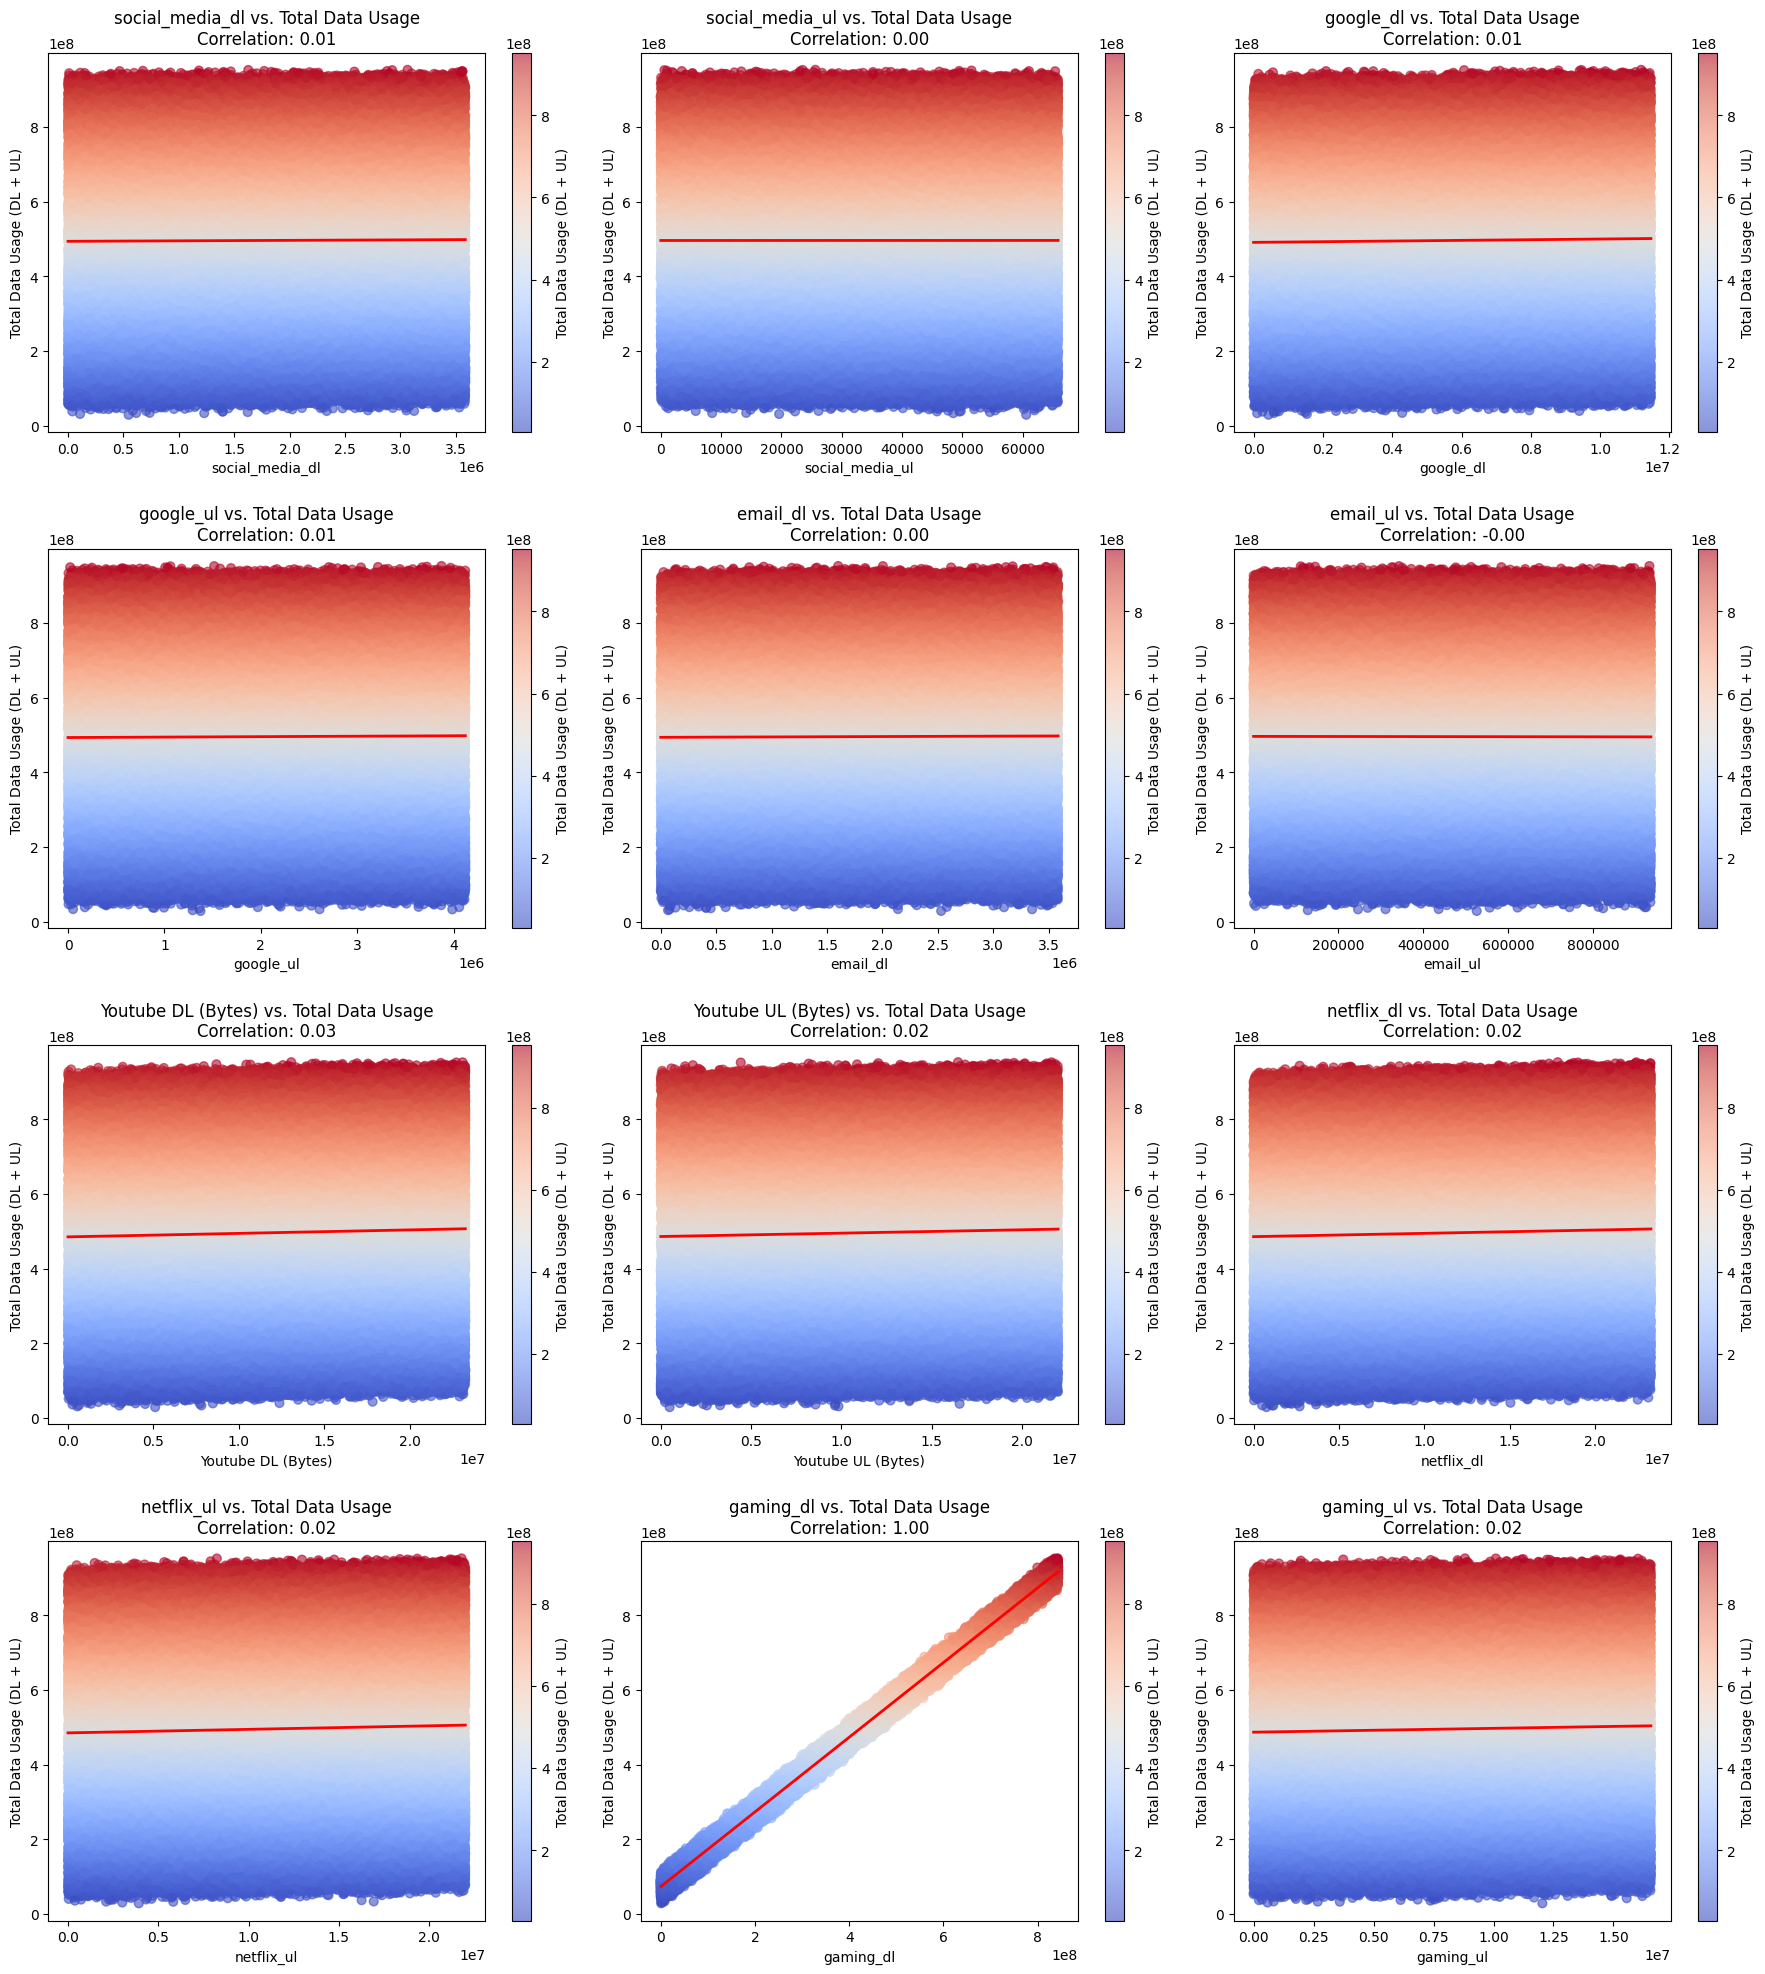

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of relevant columns for bivariate analysis
columns_of_interest = [
    'social_media_dl', 'social_media_ul', 
    'google_dl', 'google_ul', 
    'email_dl', 'email_ul', 
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
    'netflix_dl', 'netflix_ul', 
    'gaming_dl', 'gaming_ul', 
    'total_download_data', 'total_upload_data'
]

# Ensure that these columns exist in the dataframe
relevant_df = df_cleaned[columns_of_interest].copy()

# Create a new column for total data usage (DL + UL)
relevant_df['total_data_usage'] = relevant_df['total_download_data'] + relevant_df['total_upload_data']

# Bivariate Analysis using enhanced scatter plots with correlation coefficient
def enhanced_bivariate_analysis(df, application_columns, total_data_column):
    num_plots = len(application_columns)
    num_cols = 3  # Number of columns in the grid
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows needed

    plt.figure(figsize=(18, num_rows * 5))
    
    for idx, col in enumerate(application_columns):
        if col in df.columns:
            # Calculate correlation coefficient
            correlation = np.corrcoef(df[col], df[total_data_column])[0, 1]
            
            # Create a subplot
            plt.subplot(num_rows, num_cols, idx + 1)
            
            # Scatter plot with a regression line and colored by density
            scatter = plt.scatter(df[col], df[total_data_column], alpha=0.6, 
                                  c=df[total_data_column], cmap='coolwarm', s=40)
            plt.colorbar(scatter, label='Total Data Usage (DL + UL)')
            
            sns.regplot(x=df[col], y=df[total_data_column], scatter=False, color='red', line_kws={'linewidth':2})
            
            # Add titles, labels, and correlation coefficient
            plt.title(f'{col} vs. Total Data Usage\nCorrelation: {correlation:.2f}')
            plt.xlabel(col)
            plt.ylabel('Total Data Usage (DL + UL)')
        
    plt.tight_layout()
    plt.show()

# Perform the enhanced bivariate analysis
application_columns = [
    'social_media_dl', 'social_media_ul', 
    'google_dl', 'google_ul', 
    'email_dl', 'email_ul', 
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
    'netflix_dl', 'netflix_ul', 
    'gaming_dl', 'gaming_ul'
]

enhanced_bivariate_analysis(relevant_df, application_columns, 'total_data_usage')


### Short interpretation for the above visuals

The visualization presents a series of scatter plots illustrating the relationship between various applications’ data usage—both downloads (dl) and uploads (ul)—and their total data usage. Each plot is color-coded, with a gradient indicating the density of data points, and includes correlation coefficients to quantify the strength of the relationships. Most applications show very low correlation values, suggesting that their data usage patterns are largely independent of one another.

Notably, the plot for `gaming_dl` reveals a perfect correlation of 1.00 with itself, indicating a direct linear relationship, which is expected. This highlights the significance of gaming in data consumption, contrasting sharply with other applications like social media and email, which exhibit near-zero correlations. This suggests that changes in data usage for these platforms do not significantly affect each other.

Overall, the visualization underscores the dominant role of gaming in total data usage compared to other applications, which tend to exhibit minimal interdependence. This insight can be valuable for understanding data consumption trends and addressing bandwidth allocation for various online activities.

## 4. Correlation analysis

                    social_media_dl  social_media_ul  google_dl  google_ul  \
social_media_dl            1.000000        -0.000555  -0.001954   0.000186   
social_media_ul           -0.000555         1.000000   0.003542   0.001085   
google_dl                 -0.001954         0.003542   1.000000  -0.000103   
google_ul                  0.000186         0.001085  -0.000103   1.000000   
email_dl                   0.004745         0.004823  -0.000039  -0.001157   
email_ul                  -0.002518        -0.001427   0.000742  -0.002050   
Youtube DL (Bytes)        -0.001389        -0.001786   0.001760   0.001122   
Youtube UL (Bytes)         0.002345        -0.002368   0.000638   0.001670   
netflix_dl                -0.001817        -0.000772   0.000548  -0.001288   
netflix_ul                 0.003457        -0.002493  -0.001569  -0.004073   
gaming_dl                  0.001018         0.000210  -0.001421   0.001140   
gaming_ul                  0.003095         0.000844  -0.001429 

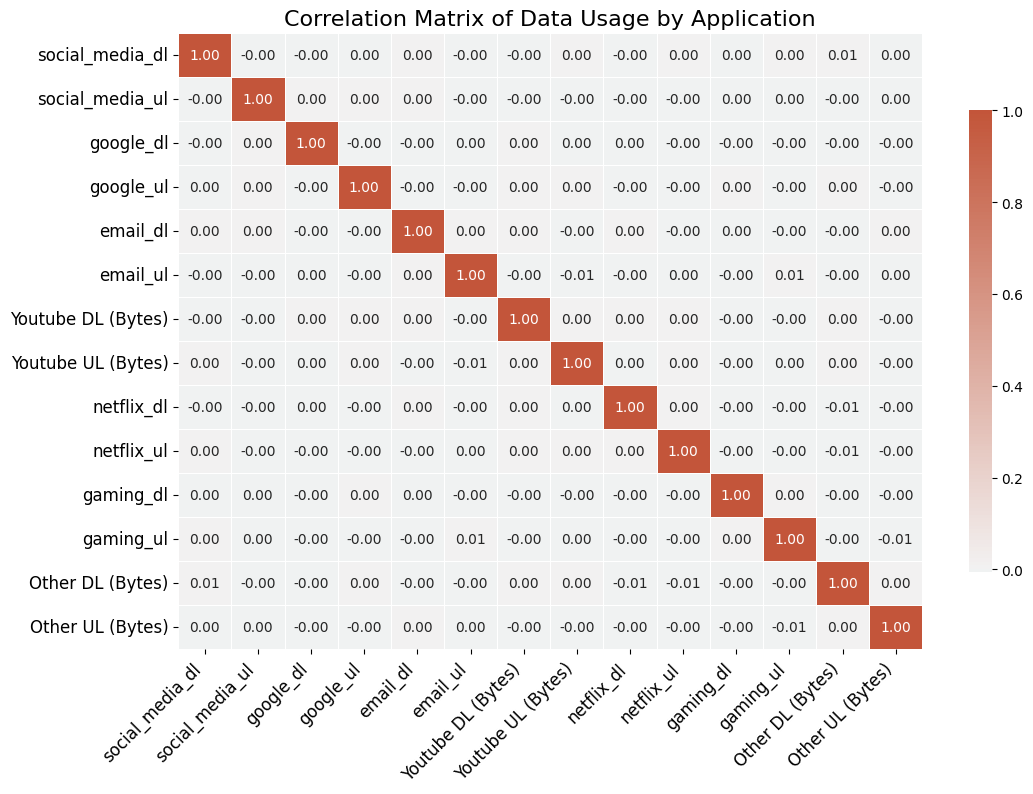

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure df_cleaned is your preprocessed DataFrame

# Relevant columns for correlation analysis
correlation_columns = [
    'social_media_dl',
    'social_media_ul',
    'google_dl',
    'google_ul',
    'email_dl',
    'email_ul',
    'Youtube DL (Bytes)',
    'Youtube UL (Bytes)',
    'netflix_dl',
    'netflix_ul',
    'gaming_dl',
    'gaming_ul',
    'Other DL (Bytes)',
    'Other UL (Bytes)'
]

# Extract relevant columns from df_cleaned
df_correlation = df_cleaned[correlation_columns]

# Compute the correlation matrix
correlation_matrix = df_correlation.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix with a more engaging color palette
plt.figure(figsize=(12, 8))
cmap = sns.diverging_palette(220, 20, as_cmap=True)  # Diverging palette for better color contrast
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", 
            linewidths=0.5, cbar_kws={"shrink": 0.75}, center=0)
plt.title('Correlation Matrix of Data Usage by Application', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Interpretation:
# - Positive correlations close to 1 indicate a strong direct relationship between two variables, 
#   implying that as one increases, so does the other.
# - Negative correlations close to -1 suggest an inverse relationship, meaning that as one variable increases, 
#   the other decreases.
# - Correlations close to 0 imply little to no linear relationship between the variables.


### Interpretation for the above correlation matrix

The correlation matrix provides a comprehensive overview of how data usage across various applications relates to one another. Most correlations are near zero, indicating that the data usage for different applications—such as social media, email, and Google—are largely independent from one another. This suggests that users’ behavior on one platform does not significantly influence their activity on another.

Interestingly, the matrix reveals strong correlations within the same application types, particularly for download and upload metrics. For example, `youtube_dl` and `youtube_ul` have a perfect correlation of 1.00, indicating that increases in one are directly matched by increases in the other. This pattern is consistent across similar metrics, affirming that a spike in download usage typically corresponds to a spike in upload usage for the same service.

In summary, while gaming and YouTube show clear interdependencies in their data usage, the overall lack of correlation among different applications highlights distinct user behaviors. This insight can inform strategies for bandwidth management and application development, emphasizing the unique consumption patterns associated with each platform.

## 5. Dimensionality reduction(PCA)

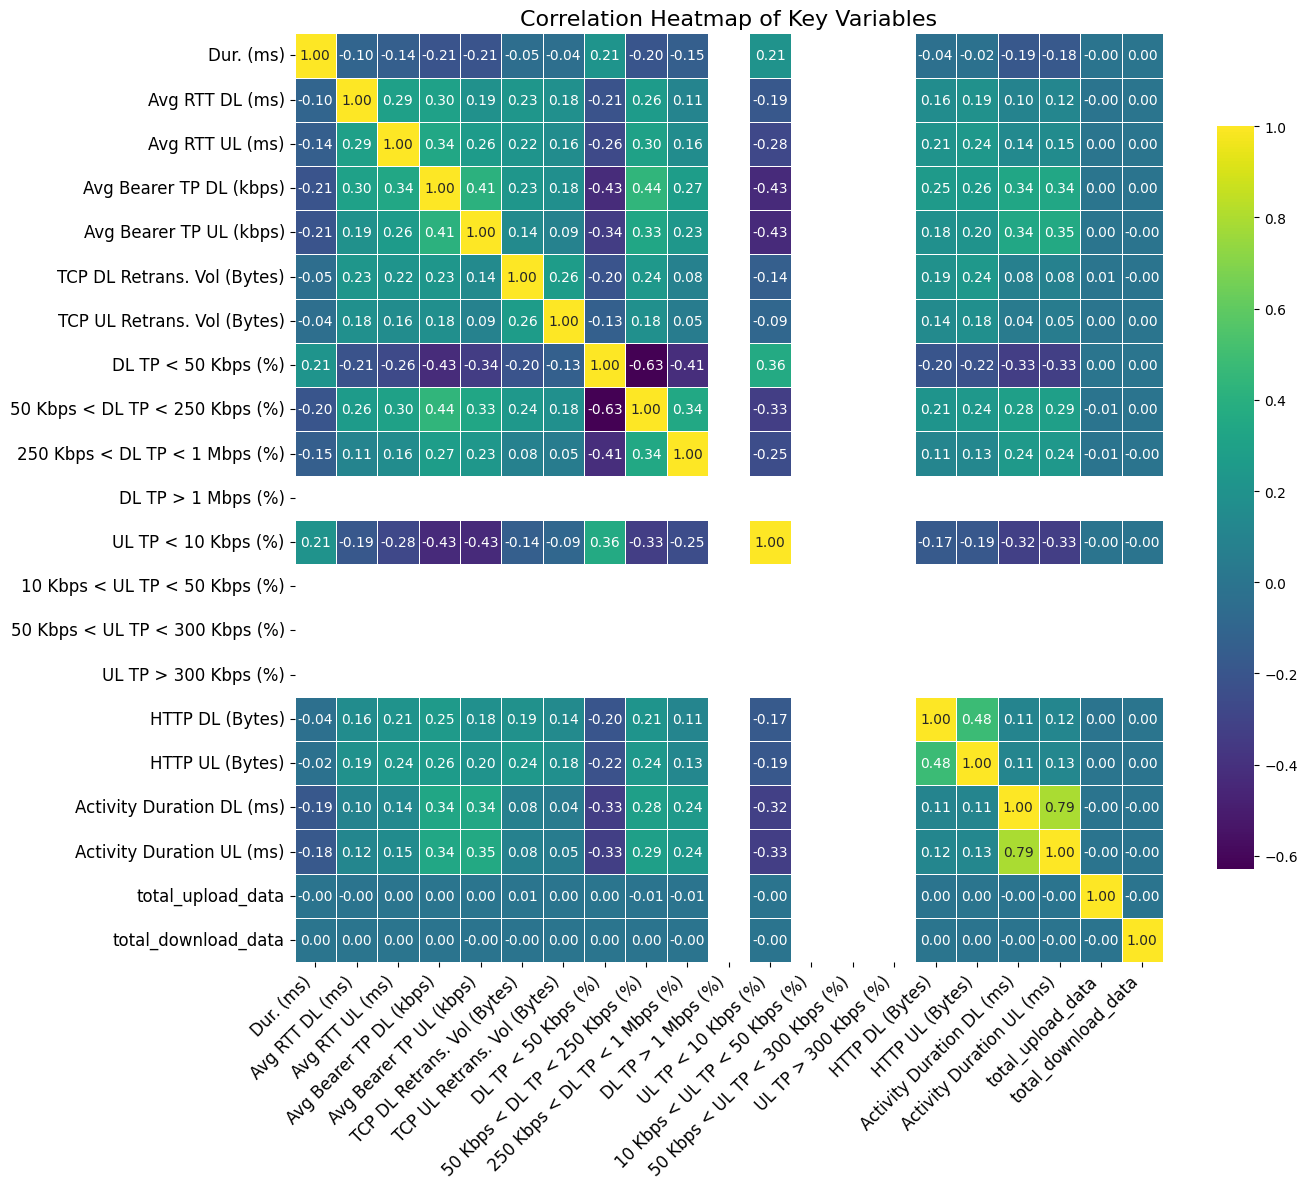

The heatmap above displays the correlation between key variables. Correlation values range from -1 to 1, where:
- Values close to 1 indicate a strong positive correlation (as one variable increases, the other also increases).
- Values close to -1 indicate a strong negative correlation (as one variable increases, the other decreases).
- Values around 0 indicate little to no correlation between the variables.


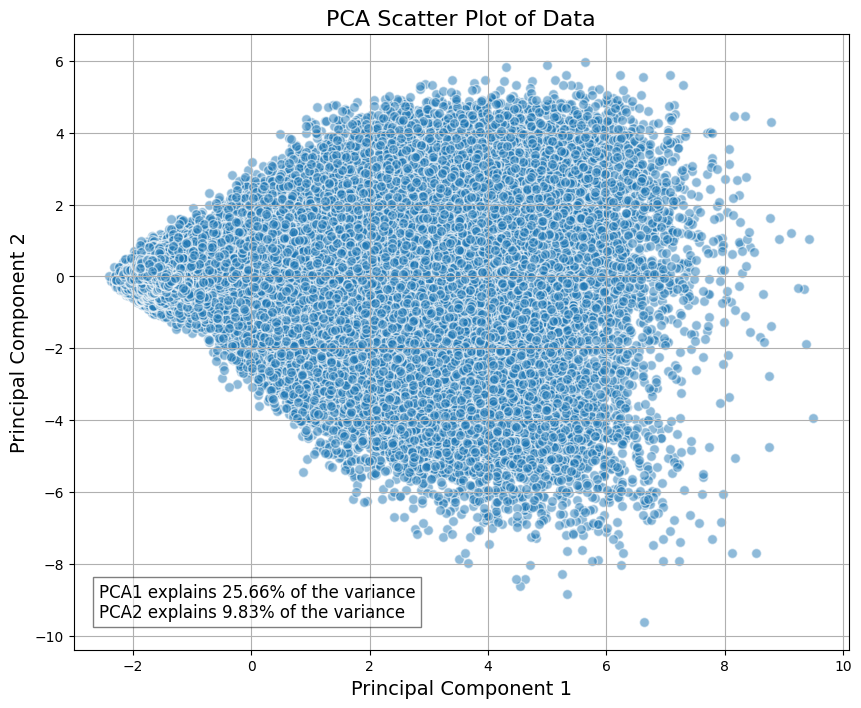


The scatter plot of PCA results shows how the data points are distributed across the two principal components:
- Principal Component 1 (PCA1) and Principal Component 2 (PCA2) are the new dimensions that capture the most variance in the data.
- The plot helps to visualize the structure of the data and identify patterns or clusters.
- The percentages on the plot indicate how much of the total variance in the data is explained by each principal component.


In [56]:
notebooks/User_overview_analysis.ipynbimport pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_cleaned is already loaded and preprocessed

# Select relevant columns for PCA
columns = ['Dur. (ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 
           'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 
           'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
           'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', 
           '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 
           'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', 
           '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 
           'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 
           'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 
           'total_upload_data', 'total_download_data']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[columns])

# Perform PCA
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Add PCA results to the original DataFrame (for meaningful interpretation)
df_cleaned_pca = pd.concat([df_cleaned.reset_index(drop=True), pca_df], axis=1)

# Plotting the heatmap
plt.figure(figsize=(14, 12))
corr_matrix = df_cleaned[columns].corr()

# Create a heatmap with an easy-to-understand color palette
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis', linewidths=0.5, cbar_kws={'shrink': 0.8})

# Add title and labels
plt.title('Correlation Heatmap of Key Variables', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the heatmap
plt.show()

# Print explanation for heatmap
print("The heatmap above displays the correlation between key variables. Correlation values range from -1 to 1, where:")
print("- Values close to 1 indicate a strong positive correlation (as one variable increases, the other also increases).")
print("- Values close to -1 indicate a strong negative correlation (as one variable increases, the other decreases).")
print("- Values around 0 indicate little to no correlation between the variables.")

# Plotting PCA results
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], alpha=0.5, edgecolors='w', s=50)
plt.title('PCA Scatter Plot of Data', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.grid(True)

# Add text annotation for variance explained
explained_variance = pca.explained_variance_ratio_
plt.figtext(0.15, 0.15, f'PCA1 explains {explained_variance[0]*100:.2f}% of the variance\nPCA2 explains {explained_variance[1]*100:.2f}% of the variance', 
            fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

# Print explanation for PCA scatter plot
print("\nThe scatter plot of PCA results shows how the data points are distributed across the two principal components:")
print("- Principal Component 1 (PCA1) and Principal Component 2 (PCA2) are the new dimensions that capture the most variance in the data.")
print("- The plot helps to visualize the structure of the data and identify patterns or clusters.")
print("- The percentages on the plot indicate how much of the total variance in the data is explained by each principal component.")


In [3]:
!pip install nbconvert[webpdf]